# Imports & Data Engg 

In [270]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
pd.set_option('display.max_columns', 1000)
pd.set_option("display.max_rows", 3000)
pd.set_option('use_inf_as_na', True)

In [271]:
def_vectors = pd.read_pickle("D:/Storage/Datasets/data_top5/defender_clusters/defender_vectors.pkl")

In [272]:
def_vectors[def_vectors['player_name'].str.contains("Vert")]

player_name       team position footedness  matches_played  passes  \
745  JanVertonghen  Tottenham       LB       left             1.0    78.0   
746  JanVertonghen  Tottenham      LCB       left            11.0   705.0   
747  JanVertonghen  Tottenham     L_CB       left            24.0  1587.0   

     accpass  progaccpass  proginaccpass  \
745     69.0           14              6   
746    629.0          191             44   
747   1415.0          345             95   

                                            accpassloc  \
745  [[[58.24, 64.6], [47.84, 57.8]], [[67.6, 63.24...   
746  [[[27.04, 49.64], [26.0, 33.32]], [[22.88, 39....   
747  [[[15.6, 65.28], [10.4, 40.12]], [[72.8, 25.84...   

                                          inaccpassloc  \
745  [[[59.28, 63.92], [90.48, 41.48]], [[52.0, 60....   
746  [[[22.88, 45.56], [56.16, 33.32]], [[21.84, 56...   
747  [[[10.4, 48.28], [35.36, 59.84]], [[14.56, 63....   

                                        progaccpassloc  \
745  [[[67.6, 63.24], [80.08, 61.88]], [[54.08, 63....   
746  [[[32.24, 49.64], [37.44, 19.72]], [[57.2, 37....   
747  [[[72.8, 25.84], [81.12, 14.96]], [[61.36, 53....   

                                      proginaccpassloc  \
745  [[[59.28, 63.92], [90.48, 41.48]], [[73.84, 65...   
746  [[[22.88, 45.56], [56.16, 33.32]], [[21.84, 56...   
747  [[[14.56, 63.92], [62.4, 47.6]], [[63.44, 58.4...   

                                           accpassvaep  \
745  [-0.0028125690296292305, 0.005345508921891451,...   
746  [-0.0022762231528759003, -0.001969918143004179...   
747  [0.0009493464604020119, 0.004111001268029213, ...   

                                         inaccpassvaep  \
745  [0.0002524210140109062, -0.004603143781423569,...   
746  [-0.00021641189232468605, 0.003091178834438324...   
747  [-0.007386647164821625, -0.002541820053011179,...   

                                       progaccpassvaep  \
745  [0.005345508921891451, 0.00448447372764349, 0....   
746  [0.001484508509747684, 0.012937873601913452, 0...   
747  [0.004111001268029213, 0.0025256285443902016, ...   

                                     proginaccpassvaep  \
745  [0.0002524210140109062, -0.005919557064771652,...   
746  [-0.00021641189232468605, 0.003091178834438324...   
747  [-0.002541820053011179, -0.001125968061387539,...   

                                            accpassoff  \
745  [-0.002592453733086586, 0.005652479827404022, ...   
746  [-0.001101824687793851, -0.0006958409212529659...   
747  [0.000494352774694562, 0.0028818603605031967, ...   

                                          inaccpassoff  \
745  [0.001600220799446106, -0.0034494996070861816,...   
746  [-0.0007239468395709991, 0.0011008516885340214...   
747  [-0.0009069014340639114, -4.1288090869784355e-...   

                                        progaccpassoff  \
745  [0.005652479827404022, 0.004444997292011976, 0...   
746  [0.001354206819087267, 0.011419539339840412, 0...   
747  [0.0028818603605031967, 0.0021346090361475945,...   

                                      proginaccpassoff  \
745  [0.001600220799446106, -0.0040491484105587006,...   
746  [-0.0007239468395709991, 0.0011008516885340214...   
747  [-4.1288090869784355e-05, -0.00011896528303623...   

                                            accpassdef  \
745  [-0.00022011541295796633, -0.00030697078909724...   
746  [-0.0011743985814973712, -0.001274077221751213...   
747  [0.0004549936857074499, 0.0012291409075260162,...   

                                          inaccpassdef  \
745  [-0.0013477997854351997, -0.001153644174337387...   
746  [0.0005075349472463131, 0.0019903271459043026,...   
747  [-0.006479745730757713, -0.0025005319621413946...   

                                        progaccpassdef  \
745  [-0.0003069707890972495, 3.9476435631513596e-0...   
746  [0.00013030169066041708, 0.0015183337964117527...   
747  [0.0012291409075260162, 0.0003910195082426071,...   

                          

In [273]:
def_vectors = def_vectors[def_vectors['progaccpass'] + def_vectors['proginaccpass'] > 20]

In [274]:
def_vectors.reset_index(inplace=True)
def_vectors.drop(['index'],inplace=True,axis=1)

In [275]:
def_vectors['progaccpass_pm']=def_vectors['progaccpass']/def_vectors['matches_played']
def_vectors['proginaccpass_pm']=def_vectors['proginaccpass']/def_vectors['matches_played']

In [276]:
cols = [
    'player_name', 'team', 'position', 'footedness', 'progaccpass_pm',
    'proginaccpass_pm', 'progpreference_per_region', 'progaccuracy_per_region',
    'total_off_region_per_pass', 'off_avgcontri', 'off_val_opp_avg'
]
def_vectors_fil = def_vectors[cols]

In [277]:
def_vectors_foot_sep = pd.get_dummies(def_vectors_fil,prefix=['foot'],columns=['footedness'])

In [278]:
def_vectors_foot_sep['position'].value_counts()

L_CB    223
LB      220
R_CB    218
RB      204
RCB     110
LCB     104
CB       80
LWB       7
RWB       6
Name: position, dtype: int64

In [279]:
def ind_cols(df):
    df1 = pd.DataFrame(
        [
            sub_list[4:]
            for sub_list in df['progpreference_per_region'].tolist()
        ],
        columns=['att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref'])
    df2 = pd.DataFrame(
        [
            sub_list[4:]
            for sub_list in df['total_off_region_per_pass'].tolist()
        ],
        columns=['att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off'])
    df3 = pd.DataFrame(
        [sub_list[4:] for sub_list in df['progaccuracy_per_region'].tolist()],
        columns=['att_LF_acc', 'att_LC_acc', 'att_RC_acc', 'att_RF_acc'])
    df4 = pd.DataFrame(df['off_avgcontri'].tolist(),
                       columns=[
                           'att_LF_offcontri', 'att_LC_offcontri',
                           'att_RC_offcontri', 'att_RF_offcontri'
                       ])
    df = pd.concat([df, df1, df3, df2, df4], axis=1)
    df.drop([
        'progpreference_per_region', 'progaccuracy_per_region',
        'total_off_region_per_pass', 'off_avgcontri'
    ],
            axis=1,
            inplace=True)
    return df

In [280]:
def_vectors_ind_footsep = ind_cols(def_vectors_foot_sep)

In [281]:
def_vectors_ind_footsep.head()

player_name            team position  progaccpass_pm  \
0      AaronCresswell        West Ham       LB        6.142857   
1      AaronCresswell        West Ham      LCB        9.200000   
2  AaronMartinCaricol        Espanyol       LB        5.064516   
3     AaronWanBissaka  Crystal Palace       RB        5.571429   
4      AbdallahN'Dour      Strasbourg       LB        7.000000   

   proginaccpass_pm  off_val_opp_avg  foot_left  foot_right  att_LF_pref  \
0          6.714286         0.145613          1           0        44.44   
1          4.550000         0.396277          1           0        56.73   
2          3.322581         0.194506          1           0        46.54   
3          2.857143         0.331250          0           1         3.39   
4          4.666667              NaN          1           0        34.29   

   att_LC_pref  att_RC_pref  att_RF_pref  att_LF_acc  att_LC_acc  att_RC_acc  \
0        30.00         6.67        12.22       57.50       33.33       66.67   
1        25.09         9.09         5.09       78.21       52.17       60.00   
2        28.46        15.00         6.92       72.73       52.70       53.85   
3         6.78        16.95        64.41       50.00       50.00       70.00   
4        25.71        11.43        20.00       58.33       88.89       25.00   

   att_RF_acc  att_LF_off  att_LC_off  att_RC_off  att_RF_off  \
0       27.27    1.854026    2.507129   22.137616   -1.200041   
1       50.00    4.098572   10.470576   19.408194    2.985546   
2       33.33    3.069377   15.188574   18.150589   -2.840615   
3       68.42   -2.041411   21.571248   36.222678    3.355633   
4       28.57    2.294035   13.948458   -3.384928   -0.063682   

   att_LF_offcontri  att_LC_offcontri  att_RC_offcontri  att_RF_offcontri  
0          0.950089          0.954619          0.756942          0.932704  
1          0.958019          0.793407          0.802108          0.761525  
2          0.977902          0.800678          0.799675          0.894704  
3          0.937676          0.710212          0.815334          0.850386  
4          0.931457          0.764561          0.638292          0.971067

In [282]:
# 4 players have att_RF_offcontri as nan, so filling it with the mean of the column
def_vectors_ind_footsep['att_RF_offcontri'] = def_vectors_ind_footsep[
    'att_RF_offcontri'].fillna((def_vectors_ind_footsep['att_RF_offcontri'].mean()))

In [283]:
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(
    def_vectors_ind_footsep[def_vectors_ind_footsep.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'foot_left'])].values)

In [284]:
def_vectors_footsep_scaled = pd.concat([
    def_vectors_ind_footsep[[
        'player_name', 'team', 'position', 'off_val_opp_avg'
    ]],
    pd.DataFrame(feat_scaled,
                 columns=def_vectors_ind_footsep.columns.difference([
                     'player_name', 'team', 'position', 'off_val_opp_avg',
                     'foot_left'
                 ]))
],
                                       axis=1)

In [285]:
def_vectors_footsep_scaled.head()

player_name            team position  off_val_opp_avg  att_LC_acc  \
0      AaronCresswell        West Ham       LB         0.145613   -1.376587   
1      AaronCresswell        West Ham      LCB         0.396277   -0.442224   
2  AaronMartinCaricol        Espanyol       LB         0.194506   -0.415939   
3     AaronWanBissaka  Crystal Palace       RB         0.331250   -0.549844   
4      AbdallahN'Dour      Strasbourg       LB              NaN    1.378892   

   att_LC_off  att_LC_offcontri  att_LC_pref  att_LF_acc  att_LF_off  \
0   -0.810493          2.695078     1.397318   -0.535623   -0.149629   
1    0.043973          0.465198     0.841366    0.385320    0.476389   
2    0.550207          0.565770     1.222946    0.141633    0.189340   
3    1.235058         -0.685557    -1.231846   -0.869137   -1.236093   
4    0.417144          0.066200     0.911568   -0.498714   -0.026908   

   att_LF_offcontri  att_LF_pref  att_RC_acc  att_RC_off  att_RC_offcontri  \
0         -0.169918     1.056555    0.256064    1.342935         -0.009170   
1          0.026898     1.735073   -0.086706    1.038599          0.492720   
2          0.520375     1.172494   -0.402753    0.898374          0.465682   
3         -0.477983    -1.209772    0.427192    2.913445          0.639689   
4         -0.632330     0.496184   -1.885348   -1.502875         -1.327604   

   att_RC_pref  att_RF_acc  att_RF_off  att_RF_offcontri  att_RF_pref  \
0    -1.266626   -1.690918   -0.825124         -0.071312    -0.822885   
1    -0.987327   -0.692672    0.177586         -0.413706    -1.207347   
2    -0.305238   -1.424778   -1.218144         -0.147319    -1.108670   
3    -0.080183    0.116289    0.266244         -0.235964     1.991288   
4    -0.717261   -1.633825   -0.552895          0.005424    -0.403374   

   foot_right  progaccpass_pm  proginaccpass_pm  
0   -1.628217       -0.603399          2.070116  
1   -1.628217        0.067918          0.656461  
2   -1.628217       -0.840191         -0.145257  
3    0.614169       -0.728879         -0.449269  
4   -1.628217       -0.415179          0.732665

# LCB Clusters

In [286]:
lcb_def_vectors = def_vectors_footsep_scaled[def_vectors_footsep_scaled['position']=='L_CB']

In [287]:
lcb_def_vectors[lcb_def_vectors['player_name'].str.contains("Lap")]

player_name             team position  off_val_opp_avg  att_LC_acc  \
111  AymericLaporte    Athletic Club     L_CB         0.151523   -0.136721   
113  AymericLaporte  Manchester City     L_CB         0.646371    1.079836   

     att_LC_off  att_LC_offcontri  att_LC_pref  att_LF_acc  att_LF_off  \
111   -0.087365          0.206879     0.274092    0.517392    0.430278   
113   -0.017683         -1.646107     0.678317    0.860245   -0.124658   

     att_LF_offcontri  att_LF_pref  att_RC_acc  att_RC_off  att_RC_offcontri  \
111          1.158979     0.566300    0.654334    0.354778          0.091799   
113          2.270281     1.288984    0.598320   -0.325665         -1.639531   

     att_RC_pref  att_RF_acc  att_RF_off  att_RF_offcontri  att_RF_pref  \
111     0.039846    0.594550    0.665126          0.188191    -0.827738   
113    -0.866144    0.771099    2.148658         -0.276881    -1.044503   

     foot_right  progaccpass_pm  proginaccpass_pm  
111   -1.628217        0.411511         -0.163848  
113   -1.628217        2.031676         -0.355958

In [288]:
lcb_def_vectors.reset_index(inplace=True)
lcb_def_vectors.drop(['index'],axis=1,inplace=True)

C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [289]:
lcb_def_vectors.head()

player_name       team position  off_val_opp_avg  att_LC_acc  \
0              AbdouDiallo   Mainz 05     L_CB         0.309003   -0.195739   
1  AbdulKhaledAkiolaAdenon     Amiens     L_CB         0.135105   -0.431809   
2           AdrianMariappa    Watford     L_CB         0.115296   -0.775500   
3              AhmedHegazy  West Brom     L_CB         0.141582   -0.195739   
4    AlejandroGalvezJimena      Eibar     L_CB              NaN    0.276899   

   att_LC_off  att_LC_offcontri  att_LC_pref  att_LF_acc  att_LF_off  \
0   -0.450656          0.124486     0.142747   -0.185211    0.189132   
1   -0.320886          0.940580    -0.301108    0.313726    0.184526   
2   -0.658345         -0.019040     0.707757   -0.202109   -0.227772   
3   -0.225178          0.654021    -0.141456   -1.169745   -0.360383   
4   -0.071161         -0.057985    -0.613619    0.545852    0.508227   

   att_LF_offcontri  att_LF_pref  att_RC_acc  att_RC_off  att_RC_offcontri  \
0          0.129511     1.189608   -0.600604    0.116615          0.244555   
1         -0.555192     0.456434   -0.007566   -0.091177          0.587315   
2          3.949849     1.003554    0.500679    0.019356         -0.174731   
3          0.108001     0.199160    0.500679   -0.382732          0.091624   
4         -0.952352     1.081951   -0.600604   -0.157444         -0.351997   

   att_RC_pref  att_RF_acc  att_RF_off  att_RF_offcontri  att_RF_pref  \
0    -0.581074   -0.523590   -0.016674         -0.088491    -0.850385   
1     0.106785    0.405266    0.374503         -0.125477    -0.865483   
2    -0.279847   -0.253497    0.310402          0.090718    -0.895679   
3    -0.142506   -0.314103    0.111567         -0.128889    -0.259943   
4    -0.623777   -0.093637    0.120481         -0.129353    -0.271266   

   foot_right  progaccpass_pm  proginaccpass_pm  
0   -1.628217       -0.244387          0.660090  
1    0.614169       -0.978474         -1.236323  
2    0.614169       -0.678687         -0.094689  
3    0.614169       -0.970612         -0.317536  
4    0.614169        0.609572          0.732665

In [290]:
lcb_def_vectors.shape

(223, 23)

In [291]:
lcb_def_vectors = lcb_def_vectors.merge(
    def_vectors[['player_name', 'team', 'position', 'footedness']],
    on=['player_name', 'position', 'team'])

## Hierarchical 

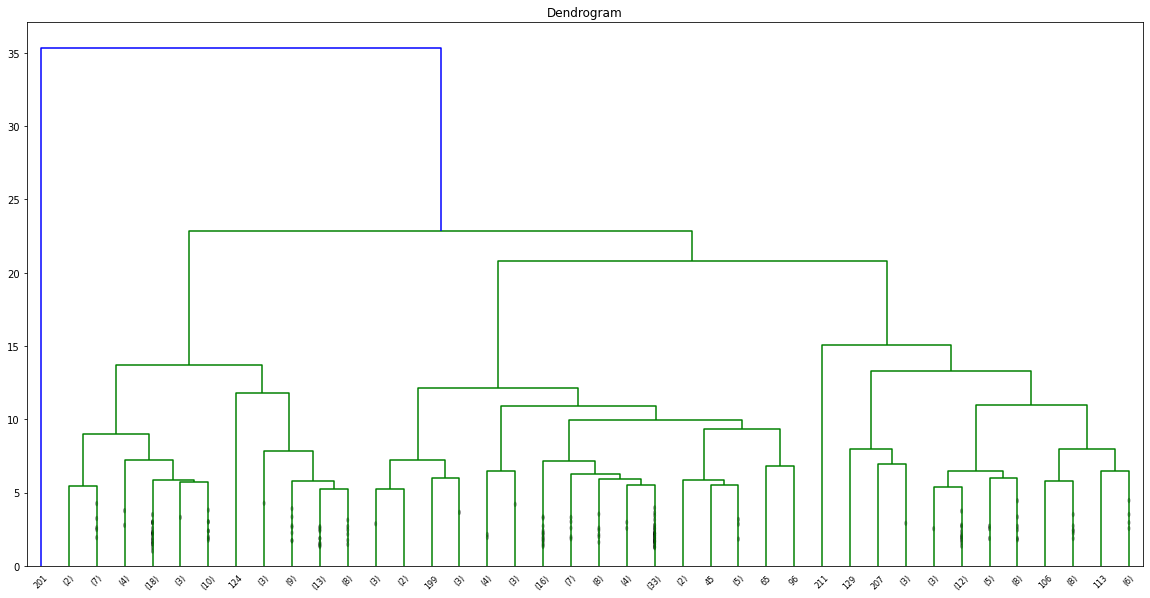

In [292]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    lcb_def_vectors[lcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [293]:
cluster = AgglomerativeClustering(n_clusters=4,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    lcb_def_vectors[lcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
groups

array([2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 3, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 1, 2], dtype=int64)

In [294]:
groupsdf = pd.DataFrame(groups, columns=['groups'])
lcb_def_vectors_cpy = pd.concat([lcb_def_vectors,groupsdf],axis=1)
lcb_def_vectors_cpy = lcb_def_vectors_cpy.astype({'groups':'category'})
lcb_def_vectors_cpy

player_name             team position  \
0                               AbdouDiallo         Mainz 05     L_CB   
1                   AbdulKhaledAkiolaAdenon           Amiens     L_CB   
2                            AdrianMariappa          Watford     L_CB   
3                               AhmedHegazy        West Brom     L_CB   
4                     AlejandroGalvezJimena            Eibar     L_CB   
5                     AlejandroGalvezJimena       Las Palmas     L_CB   
6                       AlessandroGamberini           Chievo     L_CB   
7                          AlessioRomagnoli            Milan     L_CB   
8                            AlexanderDjiku             Caen     L_CB   
9                             AlexanderHack         Mainz 05     L_CB   
10                              AlfieMawson     Swansea City     L_CB   
11                         AlinDorinelTosca        Benevento     L_CB   
12                    AlvaroGonzalezSoberon       Villarreal     L_CB   
13                      AnaitzArbillaZabala            Eibar     L_CB   
14                           AndreaBarzagli         Juventus     L_CB   
15                              AndreaCosta        Benevento     L_CB   
16                              AndreaRaggi           Monaco     L_CB   
17                         AndreuFontasPrat       Celta Vigo     L_CB   
18                      AngeloObinzeOgbonna         West Ham     L_CB   
19                    AntonioAldoCaracciolo    Hellas Verona     L_CB   
20                           AshleyWilliams          Everton     L_CB   
21                           AymenAbdennour        Marseille     L_CB   
22                           AymericLaporte    Athletic Club     L_CB   
23                           AymericLaporte  Manchester City     L_CB   
24                               BakaryKone       Strasbourg     L_CB   
25                            BakayeDibassy           Amiens     L_CB   
26                                   BenMee          Burnley     L_CB   
27                           BenjaminHubner       Hoffenheim     L_CB   
28                           BenjaminPavard        Stuttgart     L_CB   
29                             BostjanCesar           Chievo     L_CB   
30                             BramNuytinck          Udinese     L_CB   
31                     BrunoGonzalezCabrera           Getafe     L_CB   
32                         BrunoMartinsIndi       Stoke City     L_CB   
33                            CaglarSoyuncu         Freiburg     L_CB   
34                            CalumChambers          Arsenal     L_CB   
35                            ChrisSmalling   Manchester Utd     L_CB   
36                        ChristianKabasele          Watford     L_CB   
37                       ChristopherHerelle           Troyes     L_CB   
38                       ChristopherJullien         Toulouse     L_CB   
39                     ChristopherSchindler     Huddersfield     L_CB   
40                              CiaranClark    Newcastle Utd     L_CB   
41                           ClementLenglet          Sevilla     L_CB   
42            CristianEduardoZapataValencia            Milan     L_CB   
43                            DamienDaSilva             Caen     L_CB   
44                             DanielCongre      Montpellier     L_CB   
45               DanielFilipeMartinsCarrico          Sevilla     L_CB   
46                            DanieleRugani         Juventus     L_CB   
47                 DanteBonfimdaCostaSantos             Nice     L_CB   
48                     DavidRodriguezLomban            Eibar     L_CB   
49                             DavideAstori       Fiorentina     L_CB   
50                  DayotchanculleUpamecano       RB Leipzig     L_CB   
51                              DejanLovren        Liverpool     L_CB   
52                   DiegoCarlosSantosSilva           Nantes     L_CB   
53                     DiegoGonzalezPolanco           Málaga     L_CB   
54               

In [295]:
silhouette_avg = silhouette_score(lcb_def_vectors[lcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, groups) 
silhouette_avg

0.1348719871732028

In [296]:
standard_embedding = umap.UMAP(
    random_state=np.random.RandomState(42)).fit_transform(
        lcb_def_vectors[lcb_def_vectors.columns.difference([
            'player_name', 'team', 'position', 'off_val_opp_avg', 'footedness'
        ])].values)

In [297]:
plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        plot,
        x=1,
        y=2,
        color=3)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## HDBSCAN 

In [298]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(lcb_def_vectors[lcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

In [299]:
groupsdf = pd.DataFrame(labels, columns=['groups'])
lcb_def_vectors_cpy = pd.concat([lcb_def_vectors,groupsdf],axis=1)
lcb_def_vectors_cpy = lcb_def_vectors_cpy.astype({'groups':'category'})
lcb_def_vectors_cpy

player_name             team position  \
0                               AbdouDiallo         Mainz 05     L_CB   
1                   AbdulKhaledAkiolaAdenon           Amiens     L_CB   
2                            AdrianMariappa          Watford     L_CB   
3                               AhmedHegazy        West Brom     L_CB   
4                     AlejandroGalvezJimena            Eibar     L_CB   
5                     AlejandroGalvezJimena       Las Palmas     L_CB   
6                       AlessandroGamberini           Chievo     L_CB   
7                          AlessioRomagnoli            Milan     L_CB   
8                            AlexanderDjiku             Caen     L_CB   
9                             AlexanderHack         Mainz 05     L_CB   
10                              AlfieMawson     Swansea City     L_CB   
11                         AlinDorinelTosca        Benevento     L_CB   
12                    AlvaroGonzalezSoberon       Villarreal     L_CB   
13                      AnaitzArbillaZabala            Eibar     L_CB   
14                           AndreaBarzagli         Juventus     L_CB   
15                              AndreaCosta        Benevento     L_CB   
16                              AndreaRaggi           Monaco     L_CB   
17                         AndreuFontasPrat       Celta Vigo     L_CB   
18                      AngeloObinzeOgbonna         West Ham     L_CB   
19                    AntonioAldoCaracciolo    Hellas Verona     L_CB   
20                           AshleyWilliams          Everton     L_CB   
21                           AymenAbdennour        Marseille     L_CB   
22                           AymericLaporte    Athletic Club     L_CB   
23                           AymericLaporte  Manchester City     L_CB   
24                               BakaryKone       Strasbourg     L_CB   
25                            BakayeDibassy           Amiens     L_CB   
26                                   BenMee          Burnley     L_CB   
27                           BenjaminHubner       Hoffenheim     L_CB   
28                           BenjaminPavard        Stuttgart     L_CB   
29                             BostjanCesar           Chievo     L_CB   
30                             BramNuytinck          Udinese     L_CB   
31                     BrunoGonzalezCabrera           Getafe     L_CB   
32                         BrunoMartinsIndi       Stoke City     L_CB   
33                            CaglarSoyuncu         Freiburg     L_CB   
34                            CalumChambers          Arsenal     L_CB   
35                            ChrisSmalling   Manchester Utd     L_CB   
36                        ChristianKabasele          Watford     L_CB   
37                       ChristopherHerelle           Troyes     L_CB   
38                       ChristopherJullien         Toulouse     L_CB   
39                     ChristopherSchindler     Huddersfield     L_CB   
40                              CiaranClark    Newcastle Utd     L_CB   
41                           ClementLenglet          Sevilla     L_CB   
42            CristianEduardoZapataValencia            Milan     L_CB   
43                            DamienDaSilva             Caen     L_CB   
44                             DanielCongre      Montpellier     L_CB   
45               DanielFilipeMartinsCarrico          Sevilla     L_CB   
46                            DanieleRugani         Juventus     L_CB   
47                 DanteBonfimdaCostaSantos             Nice     L_CB   
48                     DavidRodriguezLomban            Eibar     L_CB   
49                             DavideAstori       Fiorentina     L_CB   
50                  DayotchanculleUpamecano       RB Leipzig     L_CB   
51                              DejanLovren        Liverpool     L_CB   
52                   DiegoCarlosSantosSilva           Nantes     L_CB   
53                     DiegoGonzalezPolanco           Málaga     L_CB   
54               

## RBF-Spectral Clustering 

In [300]:
cluster = SpectralClustering(n_clusters=3, n_components=3).fit(
    lcb_def_vectors[lcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
cluster.labels_

C:\Users\Anuj\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:296: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [301]:
silhouette_avg = silhouette_score(lcb_def_vectors[lcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, cluster.labels_) 
silhouette_avg

0.8197522679104365

## PCA + Hierarchical 

In [302]:
pca = PCA(n_components=2)
pca.fit(lcb_def_vectors[lcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
pca.explained_variance_ratio_

array([0.29667673, 0.11863729])

In [303]:
reduced = pca.transform(lcb_def_vectors[lcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

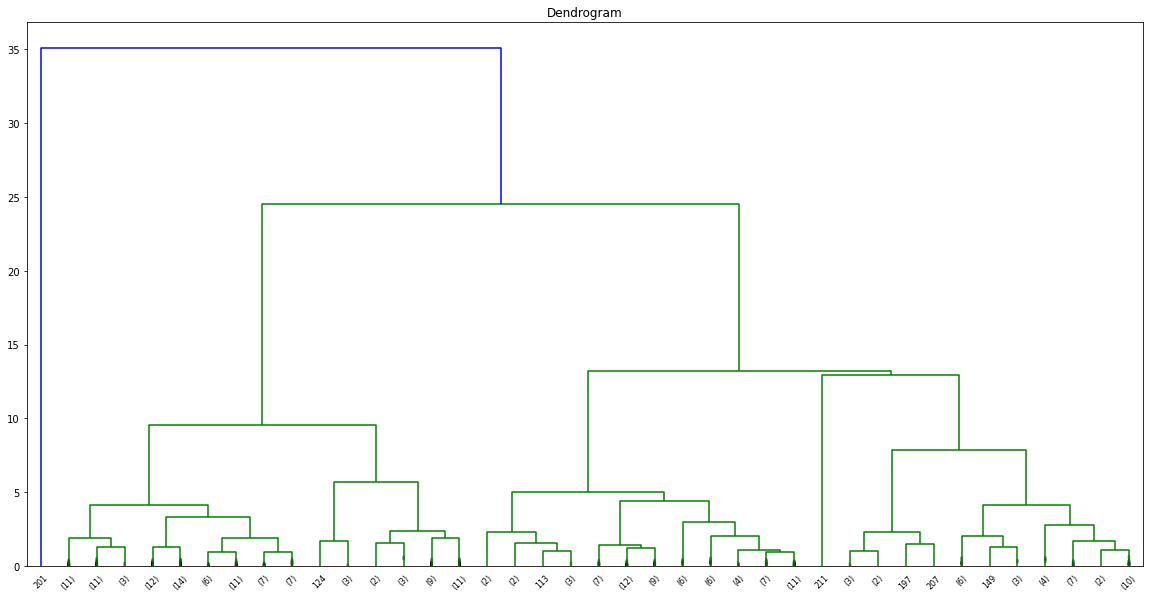

In [304]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    reduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [305]:
cluster = AgglomerativeClustering(n_clusters=3,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    reduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
redcued_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1  groups
0    -0.961433  1.227841       2
1    -1.381237  0.502026       2
2     0.178583  0.274782       0
3    -1.233108  0.691536       2
4    -0.234438  0.244096       0
5     0.346140 -0.875288       0
6    -1.165612  0.235136       2
7     0.587419 -1.443068       0
8    -0.371443  0.075956       2
9    -0.906089  0.856504       2
10   -0.586575  0.692549       2
11    0.088564 -0.149001       0
12    0.295140 -0.427545       0
13    0.812867 -0.269504       0
14    1.732659 -2.038437       0
15   -1.034096  1.538905       2
16    0.465618 -2.474681       0
17    0.390727 -0.304234       0
18   -1.162852  1.725566       2
19   -1.147448  0.516357       2
20   -0.792891  0.028402       2
21   -0.126078 -1.284838       0
22    0.423966  0.139561       0
23    2.303253 -2.079027       0
24   -0.697254 -0.283686       2
25   -0.902499  0.291306       2
26   -0.324163 -0.200451       0
27    0.926101  0.223417       0
28   -0.311827  0.445069       2
29   -0.122589 -0.027775       0
30   -0.075177 -1.224552       0
31   -2.199786  1.609322       2
32   -2.429384  2.653778       2
33   -1.150987  1.587849       2
34    1.641818 -2.474970       0
35   -1.198285 -1.028941       2
36   -1.094985  1.338349       2
37   -0.763159  0.248290       2
38   -0.470163  0.317908       2
39   -1.300285  0.719102       2
40   -0.801644  0.843445       2
41   -0.366136  0.233082       2
42    0.513332 -1.212342       0
43   -1.010936  0.496221       2
44   -0.080264  0.065152       0
45    2.338275  0.982317       0
46   -0.746379 -0.248095       2
47   -0.615168 -0.187614       2
48   -0.714490 -0.089303       2
49    0.150887 -0.194977       0
50    0.303213 -0.764359       0
51    0.247879 -1.427423       0
52   -1.002422  1.578599       2
53   -1.324573  0.867705       2
54    1.119890 -1.455530       0
55   -0.362649 -0.933359       0
56   -1.613314  0.944944       2
57   -0.787314  0.574052       2
58    0.149603 -0.045192       0
59   -1.352319  0.024215       2
60   -1.036334  0.273849       2
61   -0.436077 -0.220831       0
62    0.161917 -0.765044       0
63   -0.915820  0.221592       2
64   -0.855201  2.065471       2
65   -2.432981  3.364235       2
66   -0.061162  0.021957       0
67   -1.611989  0.943256       2
68    0.746892 -1.126852       0
69   -0.610484  0.299118       2
70    0.744558 -0.940041       0
71   -0.877164  0.916368       2
72   -0.253273 -0.758622       0
73   -1.263592  1.103272       2
74   -0.091472  0.112755       0
75   -0.630468  0.724931       2
76    1.570058  0.167701       0
77   -0.116119 -0.416155       0
78    0.444107 -0.487177       0
79   -0.424481  0.237857       2
80    0.650216 -0.565008       0
81   -1.013177  0.692976       2
82    0.719799 -1.647251       0
83   -0.260370 -0.145872       0
84    0.422644 -0.418875       0
85   -1.196817  0.492030       2
86    1.343614 -0.946810       0
87   -1.393273  2.050601       2
88   -0.410183  0.720853       2
89   -0.351244  1.115779       2
90    0.621912 -0.458348       0
91   -1.018469  0.171242       2
92   -1.288905  1.004552       2
93   -0.995070  0.516899       2
94    0.829884 -0.814493       0
95    0.319350 -0.188260       0
96    0.837427 -0.375002       0
97    0.557359 -0.815360       0
98   -0.421956 -1.160966       0
99   -1.097919  0.045759       2
100   0.141155 -1.135845       0
101  -1.058001 -0.276967       2
102   1.152481 -0.435721       0
103   0.571527 -1.126660       0
104  -0.715608  0.494176       2
105  -1.135521  0.199571       2
106   3.243351 -1.991608       0
107  -1.007982  0.740950       2
108  -1.324463  0.892775       2
109   1.284126 -1.393783       0
110  -0.668205 -0.556204       2
111   0.612658 -2.853451       0
112  -1.585407  1.138086       2
113   0.419717  0.985115       0
114   0.784609 -0.640735       0
115  -0.737133  0.921705       2
116  -0.363288  0.893339       2
117   1.588721 -1.304730       0
118  -0.284005  0.390499       2
119  -0.758098  0.288486       2
120  -0.772635  0.05

In [306]:
silhouette_avg = silhouette_score(reduced, groups) 
silhouette_avg

0.4302600914237733

In [307]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        reduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## PCA + HDBSCAN 

In [308]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(reduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
reduced_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1 groups
0    -0.961433  1.227841      2
1    -1.381237  0.502026      2
2     0.178583  0.274782      2
3    -1.233108  0.691536      2
4    -0.234438  0.244096      2
5     0.346140 -0.875288      2
6    -1.165612  0.235136      2
7     0.587419 -1.443068      2
8    -0.371443  0.075956      2
9    -0.906089  0.856504      2
10   -0.586575  0.692549      2
11    0.088564 -0.149001      2
12    0.295140 -0.427545      2
13    0.812867 -0.269504      2
14    1.732659 -2.038437      1
15   -1.034096  1.538905      2
16    0.465618 -2.474681     -1
17    0.390727 -0.304234      2
18   -1.162852  1.725566      2
19   -1.147448  0.516357      2
20   -0.792891  0.028402      2
21   -0.126078 -1.284838      2
22    0.423966  0.139561      2
23    2.303253 -2.079027      0
24   -0.697254 -0.283686      2
25   -0.902499  0.291306      2
26   -0.324163 -0.200451      2
27    0.926101  0.223417     -1
28   -0.311827  0.445069      2
29   -0.122589 -0.027775      2
30   -0.075177 -1.224552      2
31   -2.199786  1.609322     -1
32   -2.429384  2.653778     -1
33   -1.150987  1.587849      2
34    1.641818 -2.474970      1
35   -1.198285 -1.028941     -1
36   -1.094985  1.338349      2
37   -0.763159  0.248290      2
38   -0.470163  0.317908      2
39   -1.300285  0.719102      2
40   -0.801644  0.843445      2
41   -0.366136  0.233082      2
42    0.513332 -1.212342      2
43   -1.010936  0.496221      2
44   -0.080264  0.065152      2
45    2.338275  0.982317     -1
46   -0.746379 -0.248095      2
47   -0.615168 -0.187614      2
48   -0.714490 -0.089303      2
49    0.150887 -0.194977      2
50    0.303213 -0.764359      2
51    0.247879 -1.427423      2
52   -1.002422  1.578599      2
53   -1.324573  0.867705      2
54    1.119890 -1.455530      2
55   -0.362649 -0.933359      2
56   -1.613314  0.944944      2
57   -0.787314  0.574052      2
58    0.149603 -0.045192      2
59   -1.352319  0.024215      2
60   -1.036334  0.273849      2
61   -0.436077 -0.220831      2
62    0.161917 -0.765044      2
63   -0.915820  0.221592      2
64   -0.855201  2.065471     -1
65   -2.432981  3.364235     -1
66   -0.061162  0.021957      2
67   -1.611989  0.943256      2
68    0.746892 -1.126852      2
69   -0.610484  0.299118      2
70    0.744558 -0.940041      2
71   -0.877164  0.916368      2
72   -0.253273 -0.758622      2
73   -1.263592  1.103272      2
74   -0.091472  0.112755      2
75   -0.630468  0.724931      2
76    1.570058  0.167701     -1
77   -0.116119 -0.416155      2
78    0.444107 -0.487177      2
79   -0.424481  0.237857      2
80    0.650216 -0.565008      2
81   -1.013177  0.692976      2
82    0.719799 -1.647251      2
83   -0.260370 -0.145872      2
84    0.422644 -0.418875      2
85   -1.196817  0.492030      2
86    1.343614 -0.946810      2
87   -1.393273  2.050601     -1
88   -0.410183  0.720853      2
89   -0.351244  1.115779      2
90    0.621912 -0.458348      2
91   -1.018469  0.171242      2
92   -1.288905  1.004552      2
93   -0.995070  0.516899      2
94    0.829884 -0.814493      2
95    0.319350 -0.188260      2
96    0.837427 -0.375002      2
97    0.557359 -0.815360      2
98   -0.421956 -1.160966      2
99   -1.097919  0.045759      2
100   0.141155 -1.135845      2
101  -1.058001 -0.276967      2
102   1.152481 -0.435721      2
103   0.571527 -1.126660      2
104  -0.715608  0.494176      2
105  -1.135521  0.199571      2
106   3.243351 -1.991608      0
107  -1.007982  0.740950      2
108  -1.324463  0.892775      2
109   1.284126 -1.393783      2
110  -0.668205 -0.556204      2
111   0.612658 -2.853451     -1
112  -1.585407  1.138086      2
113   0.419717  0.985115     -1
114   0.784609 -0.640735      2
115  -0.737133  0.921705      2
116  -0.363288  0.893339      2
117   1.588721 -1.304730      2
118  -0.284005  0.390499      2
119  -0.758098  0.288486      2
120  -0.772635  0.058563      2
121  -0.593118 -0.147852      2
122  -1.223655  0.682635      2
123   0.866335 -1.476959      2
124  -3.02897

In [309]:
fig = px.scatter(
        reduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + Hierarchical

In [310]:
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca.fit(lcb_def_vectors[lcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
kpca.lambdas_

array([14.38051684, 13.53655068])

In [311]:
kreduced = kpca.transform(lcb_def_vectors[lcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

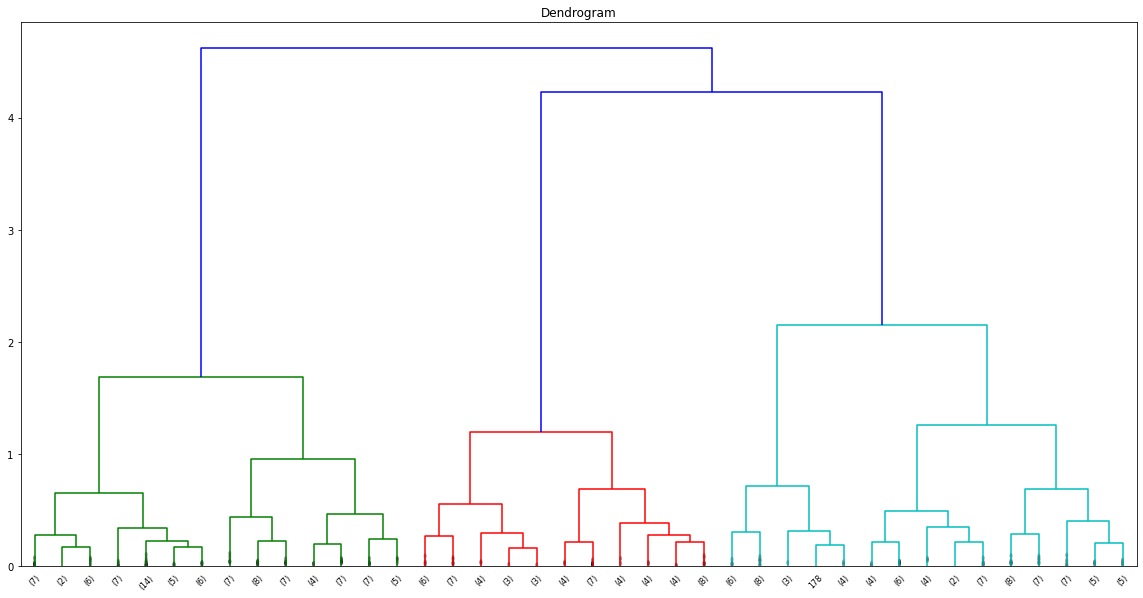

In [312]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    kreduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [313]:
cluster = AgglomerativeClustering(n_clusters=3,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(kreduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1  groups
0   -0.074458  0.536207       2
1   -0.447808 -0.091977       1
2    0.099678 -0.027115       0
3   -0.421303 -0.032720       1
4   -0.163897 -0.080588       1
5    0.078094 -0.258560       0
6   -0.382693 -0.102304       1
7    0.401710  0.036998       0
8   -0.188768 -0.083674       1
9   -0.066982  0.430161       2
10  -0.379693 -0.071654       1
11   0.215799  0.273855       2
12   0.015756 -0.212136       1
13   0.091664 -0.177362       0
14   0.348524 -0.386352       0
15  -0.073278  0.364905       2
16   0.278480 -0.304912       0
17   0.311154  0.346055       2
18  -0.036250  0.267390       2
19  -0.305990 -0.067496       1
20  -0.348378 -0.153598       1
21   0.303195  0.090909       0
22   0.230266  0.319331       2
23   0.544035 -0.014481       0
24  -0.295114 -0.180381       1
25   0.142483  0.287054       2
26   0.164068  0.339405       2
27   0.286516  0.237651       0
28  -0.214151 -0.022830       1
29   0.154947  0.249394       2
30   0.284285  0.094178       0
31  -0.374452 -0.013319       1
32  -0.159667  0.270683       2
33  -0.407179  0.049126       1
34   0.363217 -0.362458       0
35  -0.096143 -0.235217       1
36  -0.348077  0.063426       1
37  -0.331882 -0.082555       1
38  -0.318267 -0.100749       1
39  -0.444657  0.001195       1
40   0.057766  0.495463       2
41   0.109715  0.423171       2
42   0.105440 -0.349833       0
43  -0.347054 -0.125899       1
44   0.037458 -0.061795       0
45   0.124419 -0.174578       0
46   0.043425 -0.107004       0
47   0.083890  0.324868       2
48  -0.293479 -0.187329       1
49   0.203219  0.304516       2
50  -0.003471 -0.234187       1
51   0.082174 -0.292873       0
52  -0.411058  0.056271       1
53  -0.082145  0.291469       2
54   0.224155 -0.383009       0
55  -0.099530 -0.255360       1
56  -0.163876  0.425220       2
57  -0.272930 -0.028894       1
58   0.250282  0.389032       2
59  -0.319248 -0.091778       1
60  -0.020299 -0.058985       1
61   0.120900  0.190629       2
62   0.251938  0.146515       0
63  -0.348071 -0.096184       1
64  -0.102299 -0.028919       1
65  -0.014420  0.037343       1
66  -0.169565 -0.141075       1
67  -0.168887 -0.001561       1
68   0.376167  0.083056       0
69  -0.288649 -0.099388       1
70   0.137116 -0.247858       0
71  -0.026909  0.475998       2
72   0.141038 -0.074359       0
73  -0.107585  0.487598       2
74  -0.155699 -0.109297       1
75  -0.044788  0.269740       2
76   0.158207 -0.212797       0
77  -0.172315 -0.280102       1
78   0.296418  0.244567       0
79  -0.229113 -0.079341       1
80   0.368790  0.264911       0
81  -0.296808  0.000762       1
82   0.214011 -0.303033       0
83  -0.073653 -0.117026       1
84   0.293190  0.253775       0
85  -0.105296  0.298536       2
86   0.396662 -0.000908       0
87  -0.201594  0.449859       2
88   0.040655  0.460181       2
89   0.079683  0.389626       2
90   0.019734 -0.299825       1
91   0.029566  0.188051       2
92  -0.358212  0.010936       1
93  -0.394399 -0.068854       1
94   0.399832  0.208318       0
95  -0.079879 -0.196254       1
96   0.187898 -0.080554       0
97   0.070868 -0.235361       0
98  -0.082433 -0.293918       1
99  -0.356036 -0.095314       1
100  0.311200  0.141127       0
101 -0.294542 -0.179256       1
102  0.166170 -0.162009       0
103  0.127191 -0.274408       0
104 -0.390089 -0.129142       1
105 -0.016732  0.209290       2
106  0.337240 -0.235592       0
107 -0.361398 -0.009168       1
108 -0.137890  0.444926       2
109  0.226662 -0.408707       0
110 -0.194295 -0.219292       1
111  0.291281 -0.268099       0
112 -0.221169  0.444274       2
113  0.133826 -0.077756       0
114  0.346734  0.202432       0
115 -0.296010 -0.057935       1
116  0.043324  0.480748       2
117  0.335485 -0.327557       0
118  0.095937  0.413781       2
119 -0.215438 -0.015373       1
120  0.042630  0.182096       2
121 -0.250383 -0.144847       1
122 -0.233652 -0.041508       1
123  0.204198 -0.371166       0
124  0.20382

In [314]:
silhouette_avg = silhouette_score(kreduced, groups) 
silhouette_avg

0.4853832741803547

In [315]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        kreduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + HDBSCAN 

In [316]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(kreduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced),groupsdf],axis=1)
kreduced_cpy = kreduced_cpy.astype({'groups':'category'})
kreduced_cpy

0         1 groups
0   -0.074458  0.536207      1
1   -0.447808 -0.091977     -1
2    0.099678 -0.027115      6
3   -0.421303 -0.032720     -1
4   -0.163897 -0.080588     12
5    0.078094 -0.258560      7
6   -0.382693 -0.102304     10
7    0.401710  0.036998      0
8   -0.188768 -0.083674     12
9   -0.066982  0.430161      1
10  -0.379693 -0.071654     10
11   0.215799  0.273855      4
12   0.015756 -0.212136      8
13   0.091664 -0.177362      7
14   0.348524 -0.386352      2
15  -0.073278  0.364905      1
16   0.278480 -0.304912      2
17   0.311154  0.346055     -1
18  -0.036250  0.267390     -1
19  -0.305990 -0.067496     10
20  -0.348378 -0.153598     10
21   0.303195  0.090909      0
22   0.230266  0.319331      4
23   0.544035 -0.014481     -1
24  -0.295114 -0.180381     11
25   0.142483  0.287054      5
26   0.164068  0.339405     -1
27   0.286516  0.237651      0
28  -0.214151 -0.022830     12
29   0.154947  0.249394      5
30   0.284285  0.094178      0
31  -0.374452 -0.013319     10
32  -0.159667  0.270683     -1
33  -0.407179  0.049126     -1
34   0.363217 -0.362458      2
35  -0.096143 -0.235217      9
36  -0.348077  0.063426     -1
37  -0.331882 -0.082555     10
38  -0.318267 -0.100749     10
39  -0.444657  0.001195     -1
40   0.057766  0.495463      1
41   0.109715  0.423171      3
42   0.105440 -0.349833     -1
43  -0.347054 -0.125899     10
44   0.037458 -0.061795      6
45   0.124419 -0.174578      7
46   0.043425 -0.107004      6
47   0.083890  0.324868     -1
48  -0.293479 -0.187329     11
49   0.203219  0.304516      4
50  -0.003471 -0.234187      8
51   0.082174 -0.292873      7
52  -0.411058  0.056271     -1
53  -0.082145  0.291469     -1
54   0.224155 -0.383009      2
55  -0.099530 -0.255360      9
56  -0.163876  0.425220      1
57  -0.272930 -0.028894     10
58   0.250282  0.389032     -1
59  -0.319248 -0.091778     10
60  -0.020299 -0.058985     -1
61   0.120900  0.190629      5
62   0.251938  0.146515      0
63  -0.348071 -0.096184     10
64  -0.102299 -0.028919     -1
65  -0.014420  0.037343     -1
66  -0.169565 -0.141075     -1
67  -0.168887 -0.001561     -1
68   0.376167  0.083056      0
69  -0.288649 -0.099388     10
70   0.137116 -0.247858      7
71  -0.026909  0.475998      1
72   0.141038 -0.074359      6
73  -0.107585  0.487598      1
74  -0.155699 -0.109297     12
75  -0.044788  0.269740     -1
76   0.158207 -0.212797      7
77  -0.172315 -0.280102     -1
78   0.296418  0.244567      0
79  -0.229113 -0.079341     12
80   0.368790  0.264911      0
81  -0.296808  0.000762     -1
82   0.214011 -0.303033      2
83  -0.073653 -0.117026     -1
84   0.293190  0.253775      0
85  -0.105296  0.298536     -1
86   0.396662 -0.000908      0
87  -0.201594  0.449859      1
88   0.040655  0.460181      1
89   0.079683  0.389626      3
90   0.019734 -0.299825     -1
91   0.029566  0.188051     -1
92  -0.358212  0.010936     10
93  -0.394399 -0.068854     10
94   0.399832  0.208318      0
95  -0.079879 -0.196254      9
96   0.187898 -0.080554      6
97   0.070868 -0.235361      7
98  -0.082433 -0.293918      9
99  -0.356036 -0.095314     10
100  0.311200  0.141127      0
101 -0.294542 -0.179256     11
102  0.166170 -0.162009      7
103  0.127191 -0.274408      7
104 -0.390089 -0.129142     -1
105 -0.016732  0.209290     -1
106  0.337240 -0.235592      2
107 -0.361398 -0.009168     10
108 -0.137890  0.444926      1
109  0.226662 -0.408707      2
110 -0.194295 -0.219292     -1
111  0.291281 -0.268099      2
112 -0.221169  0.444274      1
113  0.133826 -0.077756      6
114  0.346734  0.202432      0
115 -0.296010 -0.057935     10
116  0.043324  0.480748      1
117  0.335485 -0.327557      2
118  0.095937  0.413781      3
119 -0.215438 -0.015373     12
120  0.042630  0.182096     -1
121 -0.250383 -0.144847     11
122 -0.233652 -0.041508     12
123  0.204198 -0.371166      2
124  0.203829 -0.038757      6
125 -0.216785 -0.241672     -1
126  0.126060 -0.046754      6
127 -0.497630  0.028905     -1
128 -0.254187

In [317]:
fig = px.scatter(
        kreduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + RBF-Spectral Clustering 

In [318]:
cluster = SpectralClustering(n_clusters=3).fit(kreduced)
cluster.labels_

array([2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1,
       2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       1, 0, 2])

In [319]:
silhouette_avg = silhouette_score(kreduced, cluster.labels_) 
silhouette_avg

0.5199061703841709

In [320]:
groupsdf = pd.DataFrame(cluster.labels_, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1  groups
0   -0.074458  0.536207       2
1   -0.447808 -0.091977       0
2    0.099678 -0.027115       1
3   -0.421303 -0.032720       0
4   -0.163897 -0.080588       0
5    0.078094 -0.258560       1
6   -0.382693 -0.102304       0
7    0.401710  0.036998       1
8   -0.188768 -0.083674       0
9   -0.066982  0.430161       2
10  -0.379693 -0.071654       0
11   0.215799  0.273855       2
12   0.015756 -0.212136       1
13   0.091664 -0.177362       1
14   0.348524 -0.386352       1
15  -0.073278  0.364905       2
16   0.278480 -0.304912       1
17   0.311154  0.346055       2
18  -0.036250  0.267390       2
19  -0.305990 -0.067496       0
20  -0.348378 -0.153598       0
21   0.303195  0.090909       1
22   0.230266  0.319331       2
23   0.544035 -0.014481       1
24  -0.295114 -0.180381       0
25   0.142483  0.287054       2
26   0.164068  0.339405       2
27   0.286516  0.237651       2
28  -0.214151 -0.022830       0
29   0.154947  0.249394       2
30   0.284285  0.094178       1
31  -0.374452 -0.013319       0
32  -0.159667  0.270683       2
33  -0.407179  0.049126       0
34   0.363217 -0.362458       1
35  -0.096143 -0.235217       0
36  -0.348077  0.063426       0
37  -0.331882 -0.082555       0
38  -0.318267 -0.100749       0
39  -0.444657  0.001195       0
40   0.057766  0.495463       2
41   0.109715  0.423171       2
42   0.105440 -0.349833       1
43  -0.347054 -0.125899       0
44   0.037458 -0.061795       1
45   0.124419 -0.174578       1
46   0.043425 -0.107004       1
47   0.083890  0.324868       2
48  -0.293479 -0.187329       0
49   0.203219  0.304516       2
50  -0.003471 -0.234187       1
51   0.082174 -0.292873       1
52  -0.411058  0.056271       0
53  -0.082145  0.291469       2
54   0.224155 -0.383009       1
55  -0.099530 -0.255360       0
56  -0.163876  0.425220       2
57  -0.272930 -0.028894       0
58   0.250282  0.389032       2
59  -0.319248 -0.091778       0
60  -0.020299 -0.058985       0
61   0.120900  0.190629       2
62   0.251938  0.146515       2
63  -0.348071 -0.096184       0
64  -0.102299 -0.028919       0
65  -0.014420  0.037343       0
66  -0.169565 -0.141075       0
67  -0.168887 -0.001561       0
68   0.376167  0.083056       1
69  -0.288649 -0.099388       0
70   0.137116 -0.247858       1
71  -0.026909  0.475998       2
72   0.141038 -0.074359       1
73  -0.107585  0.487598       2
74  -0.155699 -0.109297       0
75  -0.044788  0.269740       2
76   0.158207 -0.212797       1
77  -0.172315 -0.280102       0
78   0.296418  0.244567       2
79  -0.229113 -0.079341       0
80   0.368790  0.264911       2
81  -0.296808  0.000762       0
82   0.214011 -0.303033       1
83  -0.073653 -0.117026       0
84   0.293190  0.253775       2
85  -0.105296  0.298536       2
86   0.396662 -0.000908       1
87  -0.201594  0.449859       2
88   0.040655  0.460181       2
89   0.079683  0.389626       2
90   0.019734 -0.299825       1
91   0.029566  0.188051       2
92  -0.358212  0.010936       0
93  -0.394399 -0.068854       0
94   0.399832  0.208318       2
95  -0.079879 -0.196254       0
96   0.187898 -0.080554       1
97   0.070868 -0.235361       1
98  -0.082433 -0.293918       0
99  -0.356036 -0.095314       0
100  0.311200  0.141127       2
101 -0.294542 -0.179256       0
102  0.166170 -0.162009       1
103  0.127191 -0.274408       1
104 -0.390089 -0.129142       0
105 -0.016732  0.209290       2
106  0.337240 -0.235592       1
107 -0.361398 -0.009168       0
108 -0.137890  0.444926       2
109  0.226662 -0.408707       1
110 -0.194295 -0.219292       0
111  0.291281 -0.268099       1
112 -0.221169  0.444274       2
113  0.133826 -0.077756       1
114  0.346734  0.202432       2
115 -0.296010 -0.057935       0
116  0.043324  0.480748       2
117  0.335485 -0.327557       1
118  0.095937  0.413781       2
119 -0.215438 -0.015373       0
120  0.042630  0.182096       2
121 -0.250383 -0.144847       0
122 -0.233652 -0.041508       0
123  0.204198 -0.371166       1
124  0.20382

In [321]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        kreduced_cpy,
        x=0,
        y=1,
        color='groups')
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

# R_CB Clusters

In [322]:
rcb_def_vectors = def_vectors_footsep_scaled[def_vectors_footsep_scaled['position']=='R_CB']

In [323]:
rcb_def_vectors.reset_index(inplace=True)
rcb_def_vectors.drop(['index'],axis=1,inplace=True)

C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
rcb_def_vectors = rcb_def_vectors.merge(
    def_vectors[['player_name', 'team', 'position', 'footedness']],
    on=['player_name', 'position', 'team'])

## Hierarchical 

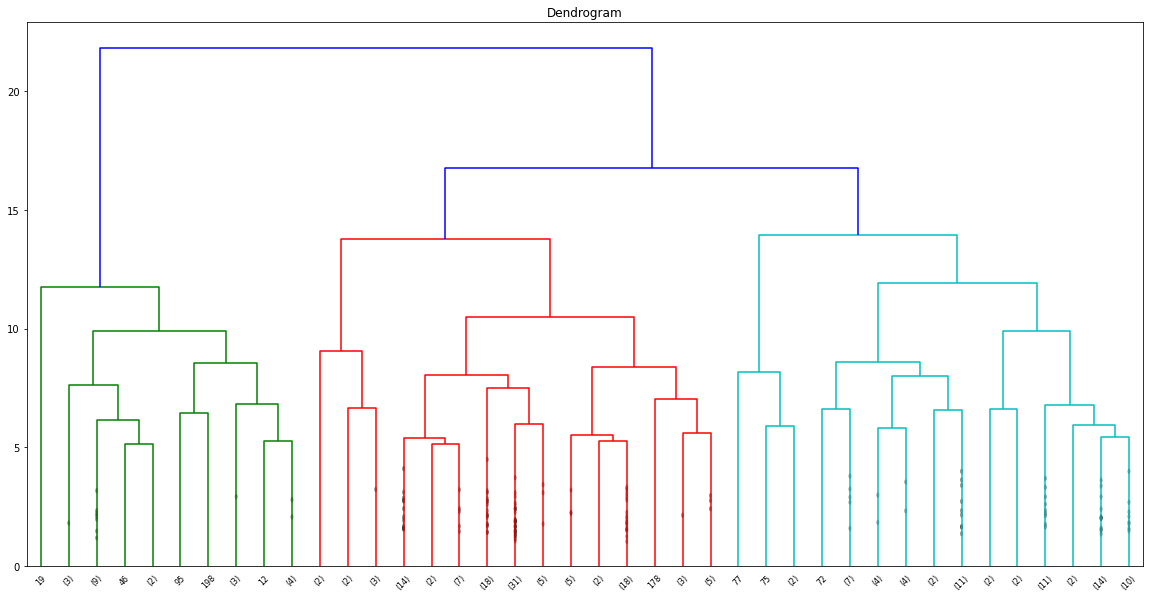

In [325]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    rcb_def_vectors[rcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [326]:
cluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    rcb_def_vectors[rcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [327]:
groupsdf = pd.DataFrame(groups, columns=['groups'])
rcb_def_vectors_cpy = pd.concat([rcb_def_vectors,groupsdf],axis=1)
rcb_def_vectors_cpy = rcb_def_vectors_cpy.astype({'groups':'category'})
rcb_def_vectors_cpy

player_name             team position  \
0                  AbdouKaderMangane       Strasbourg     R_CB   
1            AbdulKhaledAkiolaAdenon           Amiens     R_CB   
2                           AdilRami        Marseille     R_CB   
3                     AdrianMariappa          Watford     R_CB   
4                        AhmedHegazy        West Brom     R_CB   
5                         AissaMandi            Betis     R_CB   
6            AlejandroArribasGarrido        La Coruña     R_CB   
7              AlejandroGalvezJimena       Las Palmas     R_CB   
8                 AleksandarDragovic   Leicester City     R_CB   
9                        AlexFerrari    Hellas Verona     R_CB   
10                AlexisRuanoDelgado           Alavés     R_CB   
11             AlvaroGonzalezSoberon       Villarreal     R_CB   
12                    AndreaBarzagli         Juventus     R_CB   
13                   AndreaRanocchia            Inter     R_CB   
14             AntonioAldoCaracciolo    Hellas Verona     R_CB   
15           AritzElustondoIrribaria    Real Sociedad     R_CB   
16                       ArlindAjeti          Crotone     R_CB   
17                    AshleyWilliams          Everton     R_CB   
18                    AymericLaporte    Athletic Club     R_CB   
19                    AymericLaporte  Manchester City     R_CB   
20               BakaryAdamaSoumaoro            Lille     R_CB   
21                        BakaryKone       Strasbourg     R_CB   
22                    BenjaminPavard        Stuttgart     R_CB   
23                     BeratDjimsiti        Benevento     R_CB   
24                    CedricVarrault            Dijon     R_CB   
25                     CedricYambere            Dijon     R_CB   
26            ChidozieCollinsAwaziem           Nantes     R_CB   
27                     ChrisSmalling   Manchester Utd     R_CB   
28                 ChristianKabasele          Watford     R_CB   
29                 ChristopheKerbrat         Guingamp     R_CB   
30                     CraigCathcart          Watford     R_CB   
31                       CraigDawson        West Brom     R_CB   
32                     DamienDaSilva             Caen     R_CB   
33        DanielFilipeMartinsCarrico          Sevilla     R_CB   
34                     DanieleBonera       Villarreal     R_CB   
35                     DanieleRugani         Juventus     R_CB   
36                  DaniloLarangeira          Udinese     R_CB   
37          DanteBonfimdaCostaSantos             Nice     R_CB   
38                     DarioDainelli           Chievo     R_CB   
39                 DavidAngelAbraham   Eint Frankfurt     R_CB   
40                DavidGarciaSantana       Las Palmas     R_CB   
41                   DavidLopezSilva         Espanyol     R_CB   
42               DavinsonSanchezMina        Tottenham     R_CB   
43                       DejanLovren        Liverpool     R_CB   
44            DiegoCarlosSantosSilva           Nantes     R_CB   
45           DiegoJavierLlorenteRios    Real Sociedad     R_CB   
46             DiegoRobertoGodinLeal  Atlético Madrid     R_CB   
47                DjeneDakonamOrtega           Getafe     R_CB   
48                      DominikMaroh             Köln     R_CB   
49                     EdgarMiguelIe            Lille     R_CB   
50                  EdoardoGoldaniga         Sassuolo     R_CB   
51                   EdsonAndreSitoe           Rennes     R_CB   
52                EricBertrandBailly   Manchester Utd     R_CB   
53         ErickCathrielCabacoAlmada          Levante     R_CB   
54              EzequielMarceloGaray         Valencia     R_CB   
55                     EzequielMunoz          Leganés     R_CB   
56                  FabianLukasSchar        La Coruña     R_CB   
57                      FabioLucioni        Benevento     R_CB   
58         FacundoSebastianRoncaglia       Celta Vigo     R_CB   
59                      FallouDiagne             Metz     R_CB   

In [328]:
silhouette_avg = silhouette_score(rcb_def_vectors[rcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, groups) 
silhouette_avg

0.25917169722217503

In [329]:
standard_embedding = umap.UMAP(
    random_state=np.random.RandomState(42)).fit_transform(
        rcb_def_vectors[rcb_def_vectors.columns.difference([
            'player_name', 'team', 'position', 'off_val_opp_avg', 'footedness'
        ])].values)

In [330]:
plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        plot,
        x=1,
        y=2,
        color=3)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## HDBSCAN 

In [350]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(rcb_def_vectors[rcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

In [351]:
groupsdf = pd.DataFrame(labels, columns=['groups'])
rcb_def_vectors_cpy = pd.concat([rcb_def_vectors,groupsdf],axis=1)
rcb_def_vectors_cpy = rcb_def_vectors_cpy.astype({'groups':'category'})
rcb_def_vectors_cpy

player_name             team position  \
0                  AbdouKaderMangane       Strasbourg     R_CB   
1            AbdulKhaledAkiolaAdenon           Amiens     R_CB   
2                           AdilRami        Marseille     R_CB   
3                     AdrianMariappa          Watford     R_CB   
4                        AhmedHegazy        West Brom     R_CB   
5                         AissaMandi            Betis     R_CB   
6            AlejandroArribasGarrido        La Coruña     R_CB   
7              AlejandroGalvezJimena       Las Palmas     R_CB   
8                 AleksandarDragovic   Leicester City     R_CB   
9                        AlexFerrari    Hellas Verona     R_CB   
10                AlexisRuanoDelgado           Alavés     R_CB   
11             AlvaroGonzalezSoberon       Villarreal     R_CB   
12                    AndreaBarzagli         Juventus     R_CB   
13                   AndreaRanocchia            Inter     R_CB   
14             AntonioAldoCaracciolo    Hellas Verona     R_CB   
15           AritzElustondoIrribaria    Real Sociedad     R_CB   
16                       ArlindAjeti          Crotone     R_CB   
17                    AshleyWilliams          Everton     R_CB   
18                    AymericLaporte    Athletic Club     R_CB   
19                    AymericLaporte  Manchester City     R_CB   
20               BakaryAdamaSoumaoro            Lille     R_CB   
21                        BakaryKone       Strasbourg     R_CB   
22                    BenjaminPavard        Stuttgart     R_CB   
23                     BeratDjimsiti        Benevento     R_CB   
24                    CedricVarrault            Dijon     R_CB   
25                     CedricYambere            Dijon     R_CB   
26            ChidozieCollinsAwaziem           Nantes     R_CB   
27                     ChrisSmalling   Manchester Utd     R_CB   
28                 ChristianKabasele          Watford     R_CB   
29                 ChristopheKerbrat         Guingamp     R_CB   
30                     CraigCathcart          Watford     R_CB   
31                       CraigDawson        West Brom     R_CB   
32                     DamienDaSilva             Caen     R_CB   
33        DanielFilipeMartinsCarrico          Sevilla     R_CB   
34                     DanieleBonera       Villarreal     R_CB   
35                     DanieleRugani         Juventus     R_CB   
36                  DaniloLarangeira          Udinese     R_CB   
37          DanteBonfimdaCostaSantos             Nice     R_CB   
38                     DarioDainelli           Chievo     R_CB   
39                 DavidAngelAbraham   Eint Frankfurt     R_CB   
40                DavidGarciaSantana       Las Palmas     R_CB   
41                   DavidLopezSilva         Espanyol     R_CB   
42               DavinsonSanchezMina        Tottenham     R_CB   
43                       DejanLovren        Liverpool     R_CB   
44            DiegoCarlosSantosSilva           Nantes     R_CB   
45           DiegoJavierLlorenteRios    Real Sociedad     R_CB   
46             DiegoRobertoGodinLeal  Atlético Madrid     R_CB   
47                DjeneDakonamOrtega           Getafe     R_CB   
48                      DominikMaroh             Köln     R_CB   
49                     EdgarMiguelIe            Lille     R_CB   
50                  EdoardoGoldaniga         Sassuolo     R_CB   
51                   EdsonAndreSitoe           Rennes     R_CB   
52                EricBertrandBailly   Manchester Utd     R_CB   
53         ErickCathrielCabacoAlmada          Levante     R_CB   
54              EzequielMarceloGaray         Valencia     R_CB   
55                     EzequielMunoz          Leganés     R_CB   
56                  FabianLukasSchar        La Coruña     R_CB   
57                      FabioLucioni        Benevento     R_CB   
58         FacundoSebastianRoncaglia       Celta Vigo     R_CB   
59                      FallouDiagne             Metz     R_CB   

In [352]:
silhouette_avg = silhouette_score(rcb_def_vectors[rcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, labels) 
silhouette_avg

0.06882211177504344

## RBF-Spectral Clustering 

In [353]:
cluster = SpectralClustering(n_clusters=3, n_components=3).fit(
    rcb_def_vectors[rcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [354]:
silhouette_avg = silhouette_score(rcb_def_vectors[rcb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, cluster.labels_) 
silhouette_avg

0.17537788650309533

## PCA + Hierarchical 

In [356]:
pca = PCA(n_components=3)
pca.fit(rcb_def_vectors[rcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
pca.explained_variance_ratio_

array([0.21743589, 0.13945492, 0.11012449])

In [357]:
reduced = pca.transform(rcb_def_vectors[rcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

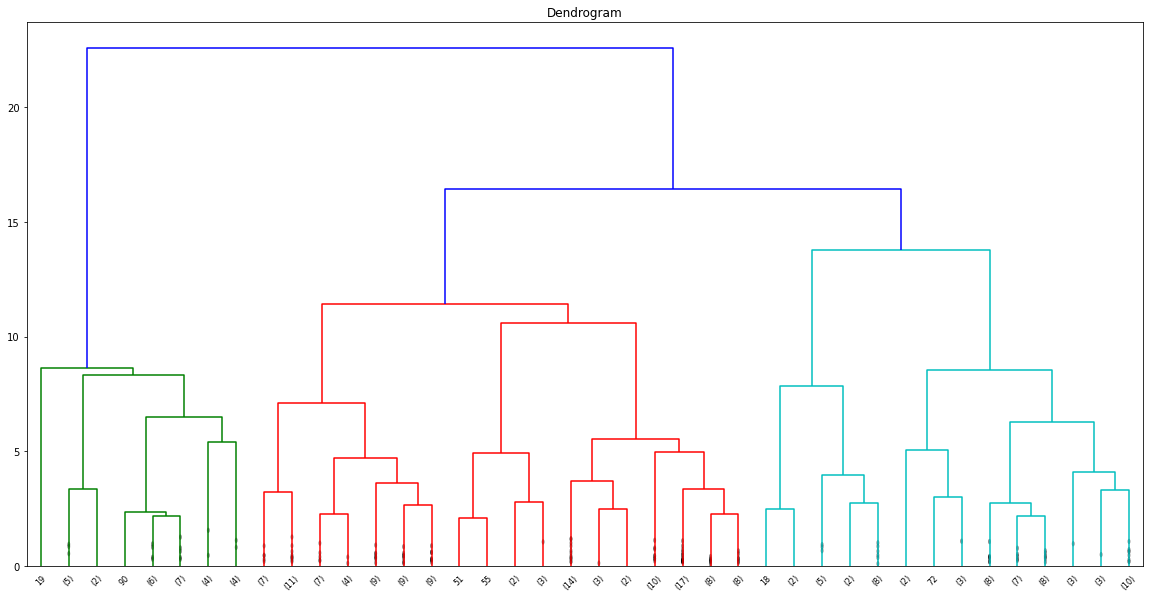

In [358]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    reduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [359]:
cluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    reduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
redcued_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1         2  groups
0   -0.793910  0.473988  0.008023       0
1   -0.517520 -0.413101 -0.439164       0
2   -0.483221  0.607868  0.442253       0
3    0.461757 -1.474751 -1.925808       0
4   -0.776691  0.186644 -0.166785       0
5    1.004457 -0.927109  1.170972       0
6   -1.516319 -0.006360 -1.385669       0
7   -0.120246  0.101315 -0.681714       0
8    0.453044 -1.284493  0.635192       0
9   -1.465599 -0.771662 -0.204892       0
10  -0.913272  0.284321  2.411572       0
11  -0.218886  1.075472  1.014997       0
12   2.627601 -0.334101 -2.614511       1
13   1.329521 -0.317338 -0.339182       0
14  -1.654358  0.174349  0.440762       0
15   1.225569 -0.056422  0.571805       0
16   0.798894 -1.429062 -0.314447       0
17  -1.467080  2.153760 -1.254660       0
18  -2.437611  4.289806 -1.774339       0
19   5.544680  4.901046  3.222641       1
20   0.649275 -1.532778  0.193188       0
21  -1.153846  0.126153 -0.808382       0
22  -3.095728  1.059241  2.996019       0
23  -0.519558 -0.707540  0.547939       0
24  -0.430971 -1.344007  1.630018       0
25  -0.300496 -0.483656 -0.442729       0
26  -0.757555 -0.062207 -0.921088       0
27   0.723974 -1.004788  0.635313       0
28   0.537380 -0.381126 -1.099722       0
29  -0.499782 -0.434865 -1.002435       0
30  -0.837329  0.240936  0.060777       0
31  -0.735911 -0.904138 -0.178556       0
32   0.343158 -0.494585  0.341483       0
33   1.261530  0.043522  0.968400       0
34  -0.319369 -0.309893  0.442105       0
35   1.141839 -0.147066  0.690114       0
36  -0.216404 -0.059313 -0.129331       0
37   0.847979  0.393132 -0.019614       0
38  -0.562165 -0.413797 -0.243587       0
39   0.938493  0.504400  0.099317       0
40  -0.525550 -0.640536 -0.181691       0
41  -0.649205  0.205704  0.539927       0
42   1.145601  0.081448  0.051040       0
43   1.963402  0.361816  0.792849       1
44  -1.140190 -0.097666  0.523783       0
45   0.149716  0.130492 -0.001526       0
46   3.226726 -1.632272  1.756414       1
47  -2.089317 -0.343735  0.837396       0
48   0.882502 -1.917156  0.494048       0
49   0.870379 -0.375588  1.116828       0
50  -1.549190 -0.372368 -1.876170       0
51  -2.479764 -1.995595 -1.879328       0
52  -0.084581 -0.222439 -1.045596       0
53  -1.564837 -0.374983 -0.744471       0
54  -0.258049 -0.191426  0.294171       0
55  -1.001533 -3.297700 -2.571738       0
56  -1.778738  1.163087  0.838645       0
57  -1.776147  1.621998 -2.227250       0
58   0.836717 -0.019669  0.164951       0
59  -0.650009  0.513964 -0.391880       0
60  -0.038849  0.138380 -0.106275       0
61   0.304224 -0.337040  0.543122       0
62   1.910141  1.408360 -0.972066       1
63  -0.680647  1.956755  0.510832       0
64  -3.647132  1.562307  3.599560       0
65  -0.912874  1.184443 -0.337979       0
66   0.505310  1.364064  0.374738       0
67  -0.231573  0.399350  0.844684       0
68   0.847958 -0.758222  0.782457       0
69   0.061027 -0.620977 -1.129635       0
70   2.769726  0.479380  1.405862       1
71   0.153670  0.639392  0.291926       0
72   0.656687 -0.809953  4.044943       0
73  -0.948810  0.077019 -1.036248       0
74  -1.718748  0.793727  0.308847       0
75   0.652537  3.492519 -1.636663       1
76  -0.063295  0.341865  0.753870       0
77  -0.479577  4.241519 -3.394666       0
78   0.118600  0.028843 -0.747304       0
79  -0.778174 -0.171533 -0.237888       0
80  -0.904701  0.049265  0.066172       0
81   0.637148 -0.698117 -0.266240       0
82  -0.144394 -0.147406  0.050010       0
83   0.096060 -0.901409  0.354312       0
84  -0.964000  0.998211 -0.624728       0
85  -0.173139  0.385973  0.548636       0
86   3.416120  1.679815  0.790171       1
87  -0.308147 -1.785738 -0.706791       0
88  -0.430445  0.165412 -0.425331       0
89   0.032077 -0.199845 -0.565119       0
90   2.508807  2.421740  0.895070       1
91   0.574295  0.364506 -1.763658       0
92  -0.559906 -0.833817  0.885345       0
93   0.920376 -0.953491 -0.158956       0
94   0.641488 -1.76438

In [360]:
silhouette_avg = silhouette_score(reduced, groups) 
silhouette_avg

0.3888119707644771

In [361]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter_3d(
        reduced_cpy,
        x=0,
        y=1, z=2,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## PCA + HDBSCAN 

In [362]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(reduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
reduced_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1         2 groups
0   -0.793910  0.473988  0.008023      1
1   -0.517520 -0.413101 -0.439164      1
2   -0.483221  0.607868  0.442253      1
3    0.461757 -1.474751 -1.925808     -1
4   -0.776691  0.186644 -0.166785      1
5    1.004457 -0.927109  1.170972      1
6   -1.516319 -0.006360 -1.385669      1
7   -0.120246  0.101315 -0.681714      1
8    0.453044 -1.284493  0.635192      1
9   -1.465599 -0.771662 -0.204892      1
10  -0.913272  0.284321  2.411572     -1
11  -0.218886  1.075472  1.014997      1
12   2.627601 -0.334101 -2.614511     -1
13   1.329521 -0.317338 -0.339182      1
14  -1.654358  0.174349  0.440762      1
15   1.225569 -0.056422  0.571805      1
16   0.798894 -1.429062 -0.314447      1
17  -1.467080  2.153760 -1.254660     -1
18  -2.437611  4.289806 -1.774339     -1
19   5.544680  4.901046  3.222641     -1
20   0.649275 -1.532778  0.193188      1
21  -1.153846  0.126153 -0.808382      1
22  -3.095728  1.059241  2.996019     -1
23  -0.519558 -0.707540  0.547939      1
24  -0.430971 -1.344007  1.630018     -1
25  -0.300496 -0.483656 -0.442729      1
26  -0.757555 -0.062207 -0.921088      1
27   0.723974 -1.004788  0.635313      1
28   0.537380 -0.381126 -1.099722      1
29  -0.499782 -0.434865 -1.002435      1
30  -0.837329  0.240936  0.060777      1
31  -0.735911 -0.904138 -0.178556      1
32   0.343158 -0.494585  0.341483      1
33   1.261530  0.043522  0.968400      1
34  -0.319369 -0.309893  0.442105      1
35   1.141839 -0.147066  0.690114      1
36  -0.216404 -0.059313 -0.129331      1
37   0.847979  0.393132 -0.019614      1
38  -0.562165 -0.413797 -0.243587      1
39   0.938493  0.504400  0.099317      1
40  -0.525550 -0.640536 -0.181691      1
41  -0.649205  0.205704  0.539927      1
42   1.145601  0.081448  0.051040      1
43   1.963402  0.361816  0.792849      0
44  -1.140190 -0.097666  0.523783      1
45   0.149716  0.130492 -0.001526      1
46   3.226726 -1.632272  1.756414     -1
47  -2.089317 -0.343735  0.837396      1
48   0.882502 -1.917156  0.494048      1
49   0.870379 -0.375588  1.116828      1
50  -1.549190 -0.372368 -1.876170      1
51  -2.479764 -1.995595 -1.879328     -1
52  -0.084581 -0.222439 -1.045596      1
53  -1.564837 -0.374983 -0.744471      1
54  -0.258049 -0.191426  0.294171      1
55  -1.001533 -3.297700 -2.571738     -1
56  -1.778738  1.163087  0.838645      1
57  -1.776147  1.621998 -2.227250     -1
58   0.836717 -0.019669  0.164951      1
59  -0.650009  0.513964 -0.391880      1
60  -0.038849  0.138380 -0.106275      1
61   0.304224 -0.337040  0.543122      1
62   1.910141  1.408360 -0.972066     -1
63  -0.680647  1.956755  0.510832     -1
64  -3.647132  1.562307  3.599560     -1
65  -0.912874  1.184443 -0.337979      1
66   0.505310  1.364064  0.374738      1
67  -0.231573  0.399350  0.844684      1
68   0.847958 -0.758222  0.782457      1
69   0.061027 -0.620977 -1.129635      1
70   2.769726  0.479380  1.405862      0
71   0.153670  0.639392  0.291926      1
72   0.656687 -0.809953  4.044943     -1
73  -0.948810  0.077019 -1.036248      1
74  -1.718748  0.793727  0.308847      1
75   0.652537  3.492519 -1.636663     -1
76  -0.063295  0.341865  0.753870      1
77  -0.479577  4.241519 -3.394666     -1
78   0.118600  0.028843 -0.747304      1
79  -0.778174 -0.171533 -0.237888      1
80  -0.904701  0.049265  0.066172      1
81   0.637148 -0.698117 -0.266240      1
82  -0.144394 -0.147406  0.050010      1
83   0.096060 -0.901409  0.354312      1
84  -0.964000  0.998211 -0.624728      1
85  -0.173139  0.385973  0.548636      1
86   3.416120  1.679815  0.790171      0
87  -0.308147 -1.785738 -0.706791      1
88  -0.430445  0.165412 -0.425331      1
89   0.032077 -0.199845 -0.565119      1
90   2.508807  2.421740  0.895070     -1
91   0.574295  0.364506 -1.763658     -1
92  -0.559906 -0.833817  0.885345      1
93   0.920376 -0.953491 -0.158956      1
94   0.641488 -1.764383  0.508063      1
95   2.648986  0.976931  0.770276      0
96   3.722758 -0.503818  0.620439  

In [363]:
fig = px.scatter_3d(
        reduced_cpy,
        x=0,
        y=1,z=2,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

In [364]:
silhouette_avg = silhouette_score(reduced, labels) 
silhouette_avg

0.2783195457278664

## Kernel PCA + Hierarchical

In [366]:
kpca = KernelPCA(n_components=3, kernel='rbf')
kpca.fit(rcb_def_vectors[rcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
kpca.lambdas_

array([14.70960601, 11.2371335 ,  7.67969125])

In [367]:
kreduced = kpca.transform(rcb_def_vectors[rcb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

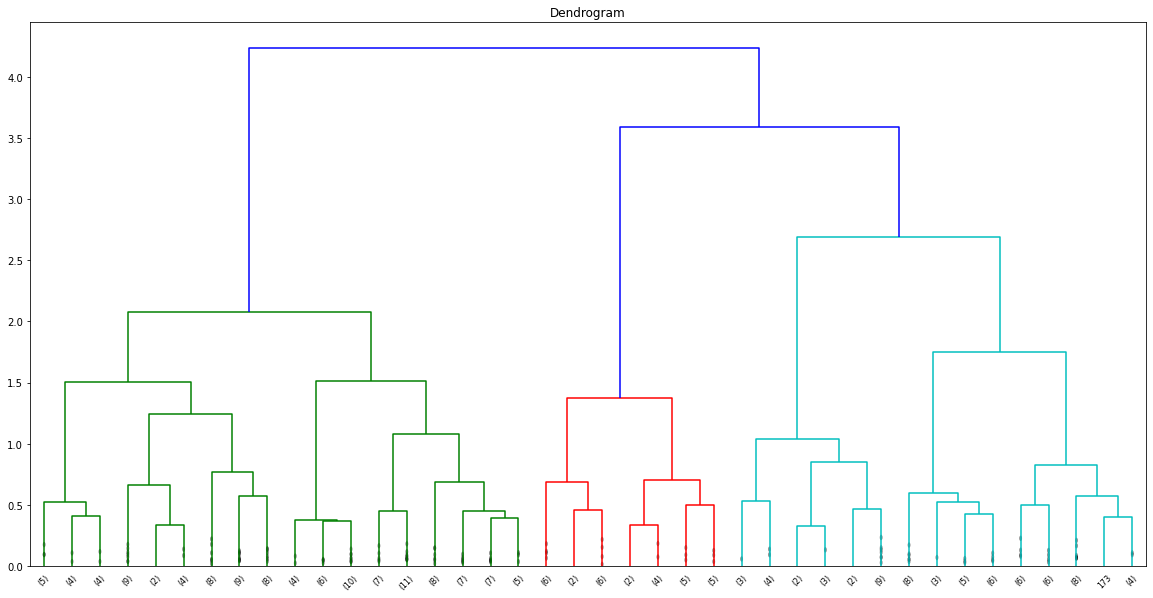

In [368]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    kreduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [374]:
cluster = AgglomerativeClustering(n_clusters=3,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(kreduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1         2  groups
0   -0.334482 -0.133173 -0.142609       1
1   -0.066987  0.080395  0.040625       1
2   -0.216190 -0.151888 -0.138019       1
3    0.157315  0.123341  0.155749       0
4   -0.274788 -0.066006 -0.019516       1
5    0.191284 -0.239215  0.235780       0
6   -0.302230  0.062362 -0.092410       1
7   -0.154869 -0.203631 -0.108609       1
8    0.122063 -0.088667  0.346246       0
9   -0.354497  0.050382  0.180420       1
10  -0.051102  0.215386  0.063049       1
11  -0.081983 -0.086922 -0.222361       1
12   0.365112  0.383057 -0.038464       2
13   0.268466 -0.009490  0.137737       0
14  -0.336087  0.135912  0.081607       1
15   0.229530 -0.280962  0.020173       0
16   0.168579 -0.059187  0.343341       0
17  -0.166896  0.252979 -0.385353       1
18   0.122853  0.533476 -0.235944       2
19   0.323987  0.550333  0.003394       2
20   0.110150 -0.058652  0.350293       0
21  -0.263641  0.066802  0.000357       1
22  -0.074618  0.544318  0.003030       2
23  -0.190707 -0.183912  0.212240       1
24  -0.009363  0.081865  0.298022       0
25  -0.212653 -0.181833  0.107653       1
26  -0.234039 -0.055826 -0.066849       1
27   0.126944 -0.269483  0.291728       0
28   0.052752 -0.162492 -0.032032       0
29  -0.204276 -0.137366 -0.002109       1
30  -0.228470  0.075549  0.031705       1
31  -0.226141 -0.111123  0.155288       1
32  -0.011845 -0.210787  0.224153       1
33   0.250597 -0.136490 -0.031903       0
34  -0.193207 -0.197999  0.054012       1
35   0.213810 -0.360893  0.097967       0
36  -0.172116 -0.260958 -0.067507       1
37   0.126173 -0.065873  0.017504       1
38  -0.237816 -0.161739  0.096497       1
39   0.108657 -0.329971 -0.139887       0
40  -0.211612 -0.151903  0.159249       1
41  -0.276617 -0.169804 -0.080077       1
42   0.237162 -0.323492 -0.044434       0
43   0.391798 -0.209615 -0.159927       0
44  -0.366677 -0.040202  0.058676       1
45  -0.080636 -0.311587 -0.069494       1
46   0.485048  0.214443  0.167783       0
47  -0.394161  0.192944  0.120876       1
48   0.174110 -0.037493  0.394506       0
49   0.120997 -0.295455  0.107008       0
50  -0.185039  0.209039  0.007277       1
51   0.124786  0.495283  0.082079       2
52  -0.023676 -0.074316 -0.050108       1
53  -0.250652  0.144153  0.017855       1
54  -0.168405 -0.204321  0.059140       1
55   0.231968  0.506293  0.110608       2
56  -0.394911  0.171022 -0.195200       1
57  -0.218253  0.294167 -0.317255       1
58   0.117825 -0.333164 -0.057763       0
59  -0.285720 -0.153837 -0.163511       1
60  -0.141498 -0.197282  0.033076       1
61  -0.015993 -0.260152  0.051979       0
62   0.361575 -0.079549 -0.331512       0
63  -0.034903  0.257312 -0.205573       1
64   0.055484  0.578790 -0.025170       2
65  -0.213974  0.137181 -0.232995       1
66   0.098016 -0.161652 -0.381653       1
67  -0.137859 -0.176341 -0.076206       1
68   0.209581 -0.127349  0.201832       0
69   0.054310 -0.016554 -0.024700       1
70   0.592568 -0.113421 -0.078873       0
71  -0.090246 -0.295301 -0.167280       1
72   0.280822  0.369445  0.103085       2
73  -0.274313 -0.034906 -0.090188       1
74  -0.130370  0.302018 -0.055534       2
75   0.271342  0.473769 -0.131531       2
76  -0.124171 -0.203976 -0.037471       1
77   0.273840  0.539302 -0.090766       2
78  -0.037523 -0.168758 -0.176112       1
79  -0.287725 -0.143744  0.032311       1
80  -0.321206 -0.042523  0.028314       1
81   0.092909 -0.264549  0.141315       0
82  -0.152488 -0.218202  0.079076       1
83  -0.079124 -0.262296  0.209155       1
84  -0.292859  0.028569 -0.218997       1
85  -0.063007 -0.079133 -0.052681       1
86   0.546642  0.168450 -0.236929       0
87  -0.049808  0.032125  0.309811       0
88  -0.119416 -0.024397 -0.168292       1
89  -0.075881 -0.246331 -0.044653       1
90   0.444723  0.222625 -0.312390       0
91   0.093448 -0.056956 -0.145673       1
92  -0.189795 -0.131491  0.244019       1
93   0.168743  0.023066  0.113706       0
94   0.115371 -0.19841

In [375]:
silhouette_avg = silhouette_score(kreduced, groups) 
silhouette_avg

0.2994920467803288

In [376]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter_3d(
        kreduced_cpy,
        x=0,
        y=1,z=2,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + HDBSCAN 

In [377]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(kreduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
kreduced_cpy = kreduced_cpy.astype({'groups':'category'})
kreduced_cpy

0         1         2 groups
0   -0.793910  0.473988  0.008023      3
1   -0.517520 -0.413101 -0.439164     -1
2   -0.483221  0.607868  0.442253      3
3    0.461757 -1.474751 -1.925808     -1
4   -0.776691  0.186644 -0.166785      3
5    1.004457 -0.927109  1.170972      2
6   -1.516319 -0.006360 -1.385669      3
7   -0.120246  0.101315 -0.681714      3
8    0.453044 -1.284493  0.635192      2
9   -1.465599 -0.771662 -0.204892      3
10  -0.913272  0.284321  2.411572     -1
11  -0.218886  1.075472  1.014997      3
12   2.627601 -0.334101 -2.614511     -1
13   1.329521 -0.317338 -0.339182     -1
14  -1.654358  0.174349  0.440762      3
15   1.225569 -0.056422  0.571805      3
16   0.798894 -1.429062 -0.314447      2
17  -1.467080  2.153760 -1.254660     -1
18  -2.437611  4.289806 -1.774339     -1
19   5.544680  4.901046  3.222641      0
20   0.649275 -1.532778  0.193188      2
21  -1.153846  0.126153 -0.808382      3
22  -3.095728  1.059241  2.996019      0
23  -0.519558 -0.707540  0.547939      3
24  -0.430971 -1.344007  1.630018      2
25  -0.300496 -0.483656 -0.442729      3
26  -0.757555 -0.062207 -0.921088      3
27   0.723974 -1.004788  0.635313      2
28   0.537380 -0.381126 -1.099722      3
29  -0.499782 -0.434865 -1.002435      3
30  -0.837329  0.240936  0.060777      3
31  -0.735911 -0.904138 -0.178556      3
32   0.343158 -0.494585  0.341483      3
33   1.261530  0.043522  0.968400     -1
34  -0.319369 -0.309893  0.442105      3
35   1.141839 -0.147066  0.690114      3
36  -0.216404 -0.059313 -0.129331      3
37   0.847979  0.393132 -0.019614     -1
38  -0.562165 -0.413797 -0.243587      3
39   0.938493  0.504400  0.099317      3
40  -0.525550 -0.640536 -0.181691      3
41  -0.649205  0.205704  0.539927      3
42   1.145601  0.081448  0.051040      3
43   1.963402  0.361816  0.792849      1
44  -1.140190 -0.097666  0.523783      3
45   0.149716  0.130492 -0.001526      3
46   3.226726 -1.632272  1.756414      0
47  -2.089317 -0.343735  0.837396      3
48   0.882502 -1.917156  0.494048      2
49   0.870379 -0.375588  1.116828      3
50  -1.549190 -0.372368 -1.876170      3
51  -2.479764 -1.995595 -1.879328      0
52  -0.084581 -0.222439 -1.045596      3
53  -1.564837 -0.374983 -0.744471      3
54  -0.258049 -0.191426  0.294171      3
55  -1.001533 -3.297700 -2.571738      0
56  -1.778738  1.163087  0.838645     -1
57  -1.776147  1.621998 -2.227250     -1
58   0.836717 -0.019669  0.164951      3
59  -0.650009  0.513964 -0.391880      3
60  -0.038849  0.138380 -0.106275      3
61   0.304224 -0.337040  0.543122      3
62   1.910141  1.408360 -0.972066     -1
63  -0.680647  1.956755  0.510832     -1
64  -3.647132  1.562307  3.599560      0
65  -0.912874  1.184443 -0.337979      3
66   0.505310  1.364064  0.374738     -1
67  -0.231573  0.399350  0.844684      3
68   0.847958 -0.758222  0.782457      2
69   0.061027 -0.620977 -1.129635      3
70   2.769726  0.479380  1.405862      1
71   0.153670  0.639392  0.291926      3
72   0.656687 -0.809953  4.044943      0
73  -0.948810  0.077019 -1.036248      3
74  -1.718748  0.793727  0.308847      3
75   0.652537  3.492519 -1.636663     -1
76  -0.063295  0.341865  0.753870      3
77  -0.479577  4.241519 -3.394666      0
78   0.118600  0.028843 -0.747304      3
79  -0.778174 -0.171533 -0.237888      3
80  -0.904701  0.049265  0.066172      3
81   0.637148 -0.698117 -0.266240      3
82  -0.144394 -0.147406  0.050010      3
83   0.096060 -0.901409  0.354312      3
84  -0.964000  0.998211 -0.624728      3
85  -0.173139  0.385973  0.548636      3
86   3.416120  1.679815  0.790171     -1
87  -0.308147 -1.785738 -0.706791      2
88  -0.430445  0.165412 -0.425331      3
89   0.032077 -0.199845 -0.565119      3
90   2.508807  2.421740  0.895070     -1
91   0.574295  0.364506 -1.763658      3
92  -0.559906 -0.833817  0.885345      3
93   0.920376 -0.953491 -0.158956     -1
94   0.641488 -1.764383  0.508063      2
95   2.648986  0.976931  0.770276     -1
96   3.722758 -0.503818  0.620439  

In [379]:
silhouette_avg = silhouette_score(kreduced, labels) 
silhouette_avg

0.15332587131506023

In [378]:
fig = px.scatter_3d(
        kreduced_cpy,
        x=0,
        y=1,z=2,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + RBF-Spectral Clustering 

In [386]:
cluster = SpectralClustering(n_clusters=3).fit(kreduced)
cluster.labels_

array([0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0,
       2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1])

In [387]:
silhouette_avg = silhouette_score(kreduced, cluster.labels_) 
silhouette_avg

0.3204019883035215

In [388]:
groupsdf = pd.DataFrame(cluster.labels_, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1         2  groups
0   -0.334482 -0.133173 -0.142609       0
1   -0.066987  0.080395  0.040625       0
2   -0.216190 -0.151888 -0.138019       0
3    0.157315  0.123341  0.155749       1
4   -0.274788 -0.066006 -0.019516       0
5    0.191284 -0.239215  0.235780       2
6   -0.302230  0.062362 -0.092410       0
7   -0.154869 -0.203631 -0.108609       0
8    0.122063 -0.088667  0.346246       2
9   -0.354497  0.050382  0.180420       0
10  -0.051102  0.215386  0.063049       1
11  -0.081983 -0.086922 -0.222361       0
12   0.365112  0.383057 -0.038464       1
13   0.268466 -0.009490  0.137737       2
14  -0.336087  0.135912  0.081607       0
15   0.229530 -0.280962  0.020173       2
16   0.168579 -0.059187  0.343341       2
17  -0.166896  0.252979 -0.385353       0
18   0.122853  0.533476 -0.235944       1
19   0.323987  0.550333  0.003394       1
20   0.110150 -0.058652  0.350293       2
21  -0.263641  0.066802  0.000357       0
22  -0.074618  0.544318  0.003030       1
23  -0.190707 -0.183912  0.212240       0
24  -0.009363  0.081865  0.298022       0
25  -0.212653 -0.181833  0.107653       0
26  -0.234039 -0.055826 -0.066849       0
27   0.126944 -0.269483  0.291728       2
28   0.052752 -0.162492 -0.032032       2
29  -0.204276 -0.137366 -0.002109       0
30  -0.228470  0.075549  0.031705       0
31  -0.226141 -0.111123  0.155288       0
32  -0.011845 -0.210787  0.224153       0
33   0.250597 -0.136490 -0.031903       2
34  -0.193207 -0.197999  0.054012       0
35   0.213810 -0.360893  0.097967       2
36  -0.172116 -0.260958 -0.067507       0
37   0.126173 -0.065873  0.017504       2
38  -0.237816 -0.161739  0.096497       0
39   0.108657 -0.329971 -0.139887       2
40  -0.211612 -0.151903  0.159249       0
41  -0.276617 -0.169804 -0.080077       0
42   0.237162 -0.323492 -0.044434       2
43   0.391798 -0.209615 -0.159927       2
44  -0.366677 -0.040202  0.058676       0
45  -0.080636 -0.311587 -0.069494       0
46   0.485048  0.214443  0.167783       1
47  -0.394161  0.192944  0.120876       0
48   0.174110 -0.037493  0.394506       2
49   0.120997 -0.295455  0.107008       2
50  -0.185039  0.209039  0.007277       0
51   0.124786  0.495283  0.082079       1
52  -0.023676 -0.074316 -0.050108       0
53  -0.250652  0.144153  0.017855       0
54  -0.168405 -0.204321  0.059140       0
55   0.231968  0.506293  0.110608       1
56  -0.394911  0.171022 -0.195200       0
57  -0.218253  0.294167 -0.317255       0
58   0.117825 -0.333164 -0.057763       2
59  -0.285720 -0.153837 -0.163511       0
60  -0.141498 -0.197282  0.033076       0
61  -0.015993 -0.260152  0.051979       0
62   0.361575 -0.079549 -0.331512       2
63  -0.034903  0.257312 -0.205573       1
64   0.055484  0.578790 -0.025170       1
65  -0.213974  0.137181 -0.232995       0
66   0.098016 -0.161652 -0.381653       2
67  -0.137859 -0.176341 -0.076206       0
68   0.209581 -0.127349  0.201832       2
69   0.054310 -0.016554 -0.024700       0
70   0.592568 -0.113421 -0.078873       2
71  -0.090246 -0.295301 -0.167280       0
72   0.280822  0.369445  0.103085       1
73  -0.274313 -0.034906 -0.090188       0
74  -0.130370  0.302018 -0.055534       1
75   0.271342  0.473769 -0.131531       1
76  -0.124171 -0.203976 -0.037471       0
77   0.273840  0.539302 -0.090766       1
78  -0.037523 -0.168758 -0.176112       0
79  -0.287725 -0.143744  0.032311       0
80  -0.321206 -0.042523  0.028314       0
81   0.092909 -0.264549  0.141315       2
82  -0.152488 -0.218202  0.079076       0
83  -0.079124 -0.262296  0.209155       0
84  -0.292859  0.028569 -0.218997       0
85  -0.063007 -0.079133 -0.052681       0
86   0.546642  0.168450 -0.236929       2
87  -0.049808  0.032125  0.309811       0
88  -0.119416 -0.024397 -0.168292       0
89  -0.075881 -0.246331 -0.044653       0
90   0.444723  0.222625 -0.312390       1
91   0.093448 -0.056956 -0.145673       2
92  -0.189795 -0.131491  0.244019       0
93   0.168743  0.023066  0.113706       2
94   0.115371 -0.19841

In [389]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter_3d(
        kreduced_cpy,
        x=0,
        y=1,z=2,
        color='groups')
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

# LB Clusters

In [390]:
lb_def_vectors = def_vectors_footsep_scaled[def_vectors_footsep_scaled['position']=='LB']

In [391]:
lb_def_vectors.reset_index(inplace=True)
lb_def_vectors.drop(['index'],axis=1,inplace=True)

C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [392]:
lb_def_vectors.head()

player_name        team position  off_val_opp_avg  att_LC_acc  \
0      AaronCresswell    West Ham       LB         0.145613   -1.376587   
1  AaronMartinCaricol    Espanyol       LB         0.194506   -0.415939   
2      AbdallahN'Dour  Strasbourg       LB              NaN    1.378892   
3         AbdouDiallo    Mainz 05       LB         0.376127    0.827895   
4      AbdoulayeBamba      Angers       LB         0.207294   -1.570999   

   att_LC_off  att_LC_offcontri  att_LC_pref  att_LF_acc  att_LF_off  \
0   -0.810493          2.695078     1.397318   -0.535623   -0.149629   
1    0.550207          0.565770     1.222946    0.141633    0.189340   
2    0.417144          0.066200     0.911568   -0.498714   -0.026908   
3    0.252734          0.222547     0.265034    0.387544   -0.218273   
4   -0.664207         -0.178370     0.467713   -0.068704    0.134218   

   att_LF_offcontri  att_LF_pref  att_RC_acc  att_RC_off  att_RC_offcontri  \
0         -0.169918     1.056555    0.256064    1.342935         -0.009170   
1          0.520375     1.172494   -0.402753    0.898374          0.465682   
2         -0.632330     0.496184   -1.885348   -1.502875         -1.327604   
3         -0.118272     1.424798    1.234525    2.893885         -0.827303   
4          0.004840     2.141962   -1.885348   -1.316294          0.033857   

   att_RC_pref  att_RF_acc  att_RF_off  att_RF_offcontri  att_RF_pref  \
0    -1.266626   -1.690918   -0.825124         -0.071312    -0.822885   
1    -0.305238   -1.424778   -1.218144         -0.147319    -1.108670   
2    -0.717261   -1.633825   -0.552895          0.005424    -0.403374   
3    -0.240607   -1.424778   -3.249804         -0.163439    -1.122150   
4    -1.444362   -1.424778   -1.328619         -0.069736    -1.274210   

   foot_right  progaccpass_pm  proginaccpass_pm  
0   -1.628217       -0.603399          2.070116  
1   -1.628217       -0.840191         -0.145257  
2   -1.628217       -0.415179          0.732665  
3   -1.628217       -0.415179         -1.009132  
4    0.614169       -0.986112         -0.094689

In [393]:
lb_def_vectors = lb_def_vectors.merge(
    def_vectors[['player_name', 'team', 'position', 'footedness']],
    on=['player_name', 'position', 'team'])

## Hierarchical 

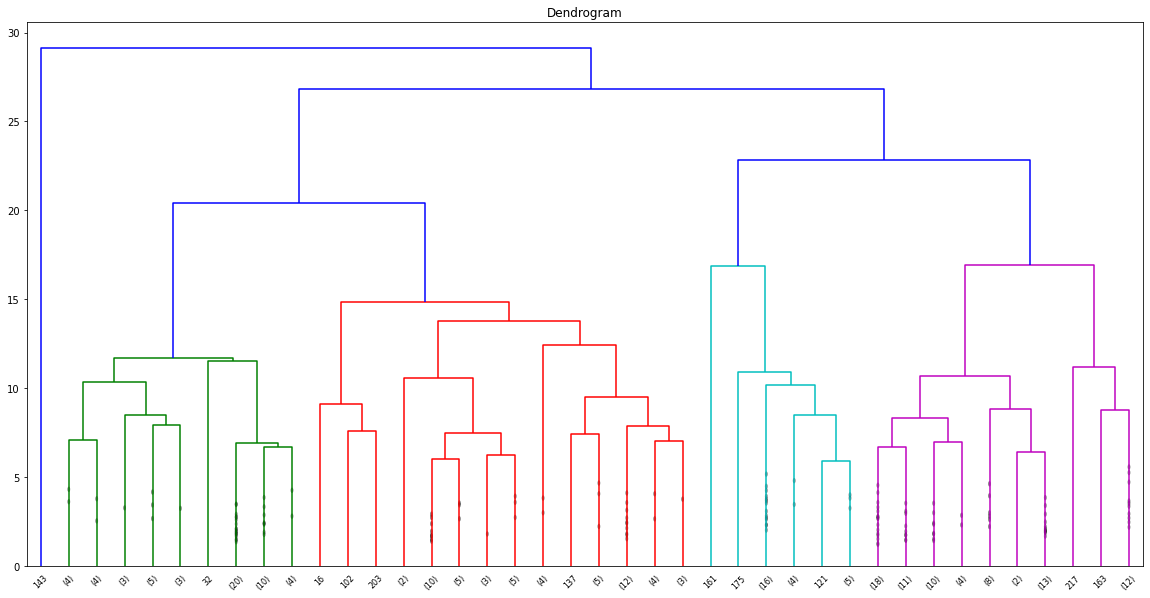

In [394]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    lb_def_vectors[lb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [398]:
cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    lb_def_vectors[lb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
groups

array([4, 0, 2, 2, 4, 0, 1, 4, 2, 0, 0, 0, 4, 0, 4, 2, 2, 0, 2, 4, 2, 2,
       0, 0, 4, 4, 0, 0, 0, 0, 4, 2, 4, 0, 2, 2, 0, 0, 4, 4, 0, 1, 0, 4,
       0, 1, 0, 2, 0, 0, 2, 2, 4, 1, 0, 0, 2, 1, 0, 0, 0, 4, 4, 0, 4, 4,
       0, 4, 4, 1, 0, 0, 4, 0, 0, 0, 1, 2, 2, 4, 4, 0, 4, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 2, 1, 4, 0, 0, 1, 2, 0, 0, 2, 2, 4, 0, 2, 0, 2, 0,
       1, 2, 1, 0, 4, 0, 2, 2, 4, 2, 0, 1, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0,
       0, 4, 1, 2, 2, 2, 4, 0, 4, 4, 2, 3, 0, 0, 1, 0, 2, 4, 0, 1, 4, 0,
       2, 0, 0, 0, 2, 4, 4, 1, 0, 0, 2, 2, 2, 1, 4, 4, 4, 4, 1, 2, 4, 1,
       2, 0, 4, 1, 2, 2, 0, 4, 0, 0, 2, 4, 4, 0, 0, 4, 2, 2, 1, 4, 0, 0,
       2, 0, 4, 0, 0, 2, 0, 1, 0, 4, 2, 4, 1, 2, 4, 0, 0, 2, 1, 0, 2, 1],
      dtype=int64)

In [399]:
groupsdf = pd.DataFrame(groups, columns=['groups'])
lb_def_vectors_cpy = pd.concat([lb_def_vectors,groupsdf],axis=1)
lb_def_vectors_cpy = lb_def_vectors_cpy.astype({'groups':'category'})
lb_def_vectors_cpy

player_name             team position  \
0                      AaronCresswell         West Ham       LB   
1                  AaronMartinCaricol         Espanyol       LB   
2                      AbdallahN'Dour       Strasbourg       LB   
3                         AbdouDiallo         Mainz 05       LB   
4                      AbdoulayeBamba           Angers       LB   
5                          AdamMasina          Bologna       LB   
6                           AdamSmith      Bournemouth       LB   
7                        AdamaMbengue             Caen       LB   
8            AlbertoDeLaBellaMadureno    Real Sociedad       LB   
9                  AlbertoMorenoPerez        Liverpool       LB   
10                  AleksandarKolarov             Roma       LB   
11                AlexSandroLoboSilva         Juventus       LB   
12            AliAdnanKadhimAlTameemi          Udinese       LB   
13                   AlinDorinelTosca            Betis       LB   
14                     AllanRomeoNyom        West Brom       LB   
15                        AndreaRaggi           Monaco       LB   
16                    AndrewRobertson        Liverpool       LB   
17                AntonioGarciaAranda          Levante       LB   
18               AntonioLatorreGrueso         Valencia       LB   
19         AntonioManuelLunaRodriguez          Levante       LB   
20                    AntonioRukavina       Villarreal       LB   
21                  ArnoldBoukaMoutou            Dijon       LB   
22                      ArthurMasuaku         West Ham       LB   
23                        AshleyYoung   Manchester Utd       LB   
24                      BakayeDibassy           Amiens       LB   
25                        BenChilwell   Leicester City       LB   
26                          BenDavies        Tottenham       LB   
27                      BenjaminMendy  Manchester City       LB   
28                  BenoitAssouEkotto             Metz       LB   
29     BernardoFernandesdaSilvaJunior       RB Leipzig       LB   
30               BorjaHerreraGonzalez       Las Palmas       LB   
31                      BrunoMartella          Crotone       LB   
32           CedricRicardoAlvesSoares      Southampton       LB   
33               ChancelMbembaMangulu    Newcastle Utd       LB   
34                      CharlesTraore           Troyes       LB   
35                     CharlieDaniels      Bournemouth       LB   
36                      CharlieTaylor          Burnley       LB   
37                     CheikhM'Bengue    Saint-Étienne       LB   
38                          ChrisLowe     Huddersfield       LB   
39                     ChristianFuchs   Leicester City       LB   
40                    ChristianGunter         Freiburg       LB   
41                   ChristopheJallet             Nice       LB   
42              CristianDanielAnsaldi           Torino       LB   
43                   CristianMolinaro           Torino       LB   
44                   CristianoBiraghi       Fiorentina       LB   
45       DalbertHenriqueChagasEstevao            Inter       LB   
46                         DaleyBlind   Manchester Utd       LB   
47                     DanAxelZagadou         Dortmund       LB   
48             DaniCastellanoBetancor       Las Palmas       LB   
49                    DanielBrosinski         Mainz 05       LB   
50                     DanielPavlovic          Crotone       LB   
51                   DaniloD'Ambrosio            Inter       LB   
52               DaniloFernandoAvelar           Amiens       LB   
53                  DaniloLuizdaSilva  Manchester City       LB   
54                          DannyRose        Tottenham       LB   
55                     DavidJuncaRene            Eibar       LB   
56               DavidOlatukunboAlaba    Bayern Munich       LB   
57                       DavideSanton            Inter       LB   
58                         DennisAogo        Stuttgart       LB   
59    

In [400]:
silhouette_avg = silhouette_score(lb_def_vectors[lb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, groups) 
silhouette_avg

0.08032295701043889

In [401]:
standard_embedding = umap.UMAP(
    random_state=np.random.RandomState(42)).fit_transform(
        lb_def_vectors[lb_def_vectors.columns.difference([
            'player_name', 'team', 'position', 'off_val_opp_avg', 'footedness'
        ])].values)

In [402]:
plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        plot,
        x=1,
        y=2,
        color=3)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## HDBSCAN 

In [403]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(lb_def_vectors[lb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

In [404]:
groupsdf = pd.DataFrame(labels, columns=['groups'])
lb_def_vectors_cpy = pd.concat([lb_def_vectors,groupsdf],axis=1)
lb_def_vectors_cpy = lb_def_vectors_cpy.astype({'groups':'category'})
lb_def_vectors_cpy

player_name             team position  \
0                      AaronCresswell         West Ham       LB   
1                  AaronMartinCaricol         Espanyol       LB   
2                      AbdallahN'Dour       Strasbourg       LB   
3                         AbdouDiallo         Mainz 05       LB   
4                      AbdoulayeBamba           Angers       LB   
5                          AdamMasina          Bologna       LB   
6                           AdamSmith      Bournemouth       LB   
7                        AdamaMbengue             Caen       LB   
8            AlbertoDeLaBellaMadureno    Real Sociedad       LB   
9                  AlbertoMorenoPerez        Liverpool       LB   
10                  AleksandarKolarov             Roma       LB   
11                AlexSandroLoboSilva         Juventus       LB   
12            AliAdnanKadhimAlTameemi          Udinese       LB   
13                   AlinDorinelTosca            Betis       LB   
14                     AllanRomeoNyom        West Brom       LB   
15                        AndreaRaggi           Monaco       LB   
16                    AndrewRobertson        Liverpool       LB   
17                AntonioGarciaAranda          Levante       LB   
18               AntonioLatorreGrueso         Valencia       LB   
19         AntonioManuelLunaRodriguez          Levante       LB   
20                    AntonioRukavina       Villarreal       LB   
21                  ArnoldBoukaMoutou            Dijon       LB   
22                      ArthurMasuaku         West Ham       LB   
23                        AshleyYoung   Manchester Utd       LB   
24                      BakayeDibassy           Amiens       LB   
25                        BenChilwell   Leicester City       LB   
26                          BenDavies        Tottenham       LB   
27                      BenjaminMendy  Manchester City       LB   
28                  BenoitAssouEkotto             Metz       LB   
29     BernardoFernandesdaSilvaJunior       RB Leipzig       LB   
30               BorjaHerreraGonzalez       Las Palmas       LB   
31                      BrunoMartella          Crotone       LB   
32           CedricRicardoAlvesSoares      Southampton       LB   
33               ChancelMbembaMangulu    Newcastle Utd       LB   
34                      CharlesTraore           Troyes       LB   
35                     CharlieDaniels      Bournemouth       LB   
36                      CharlieTaylor          Burnley       LB   
37                     CheikhM'Bengue    Saint-Étienne       LB   
38                          ChrisLowe     Huddersfield       LB   
39                     ChristianFuchs   Leicester City       LB   
40                    ChristianGunter         Freiburg       LB   
41                   ChristopheJallet             Nice       LB   
42              CristianDanielAnsaldi           Torino       LB   
43                   CristianMolinaro           Torino       LB   
44                   CristianoBiraghi       Fiorentina       LB   
45       DalbertHenriqueChagasEstevao            Inter       LB   
46                         DaleyBlind   Manchester Utd       LB   
47                     DanAxelZagadou         Dortmund       LB   
48             DaniCastellanoBetancor       Las Palmas       LB   
49                    DanielBrosinski         Mainz 05       LB   
50                     DanielPavlovic          Crotone       LB   
51                   DaniloD'Ambrosio            Inter       LB   
52               DaniloFernandoAvelar           Amiens       LB   
53                  DaniloLuizdaSilva  Manchester City       LB   
54                          DannyRose        Tottenham       LB   
55                     DavidJuncaRene            Eibar       LB   
56               DavidOlatukunboAlaba    Bayern Munich       LB   
57                       DavideSanton            Inter       LB   
58                         DennisAogo        Stuttgart       LB   
59    

In [405]:
silhouette_avg = silhouette_score(lb_def_vectors[lb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, labels) 
silhouette_avg

-0.017986397879503162

## RBF-Spectral Clustering 

In [408]:
cluster = SpectralClustering(n_clusters=2, n_components=2).fit(
    lb_def_vectors[lb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [409]:
silhouette_avg = silhouette_score(lb_def_vectors[lb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, cluster.labels_) 
silhouette_avg

0.745272010215453

## PCA + Hierarchical 

In [413]:
pca = PCA(n_components=4)
pca.fit(lb_def_vectors[lb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
pca.explained_variance_ratio_

array([0.20447429, 0.16890539, 0.13098525, 0.10105298])

In [414]:
reduced = pca.transform(lb_def_vectors[lb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

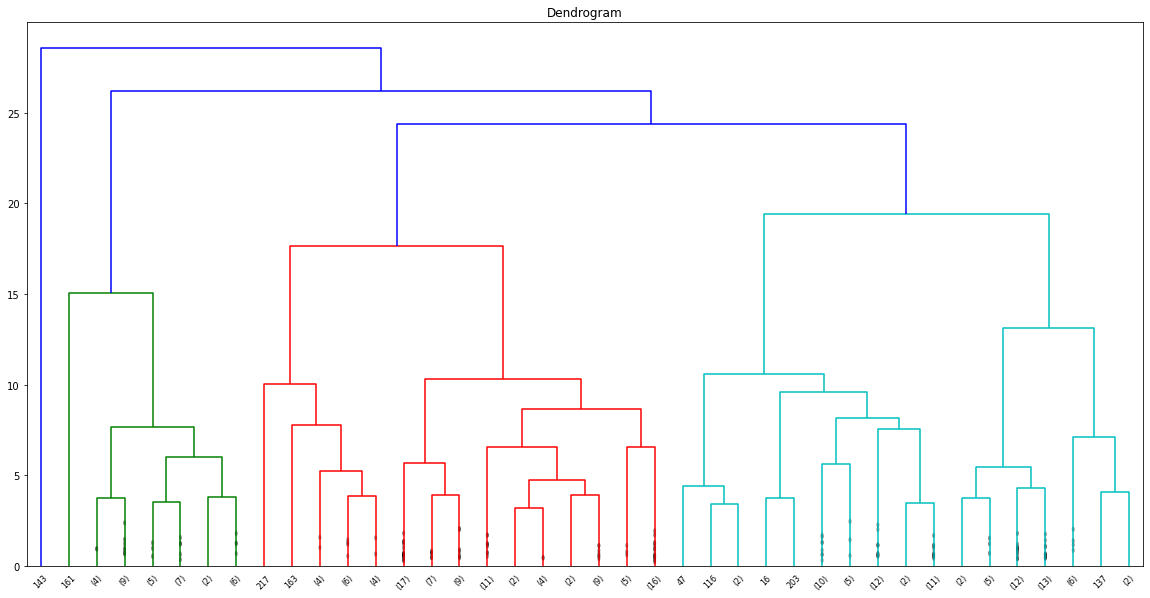

In [415]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    reduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [428]:
cluster = AgglomerativeClustering(n_clusters=6,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    reduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
redcued_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1          2         3  groups
0    -0.375510  0.503093  -1.189494  2.671164       2
1    -0.497499  0.139613  -0.518190  0.295166       2
2     0.181946 -2.721558   0.085566  0.108184       1
3    -2.312835  2.657434   0.288640 -0.857920       5
4    -0.122651 -2.427703  -0.622459 -0.236575       1
5     2.171073  1.193445  -0.859333  0.614748       2
6     2.764694  0.683095   0.915234 -1.187085       0
7     0.666727 -0.682082  -0.448715  1.396762       2
8    -1.135921  0.154287   0.579560  0.143164       2
9     1.401608  0.222401   0.304431 -0.406724       2
10   -0.913193  0.835286   0.680478  0.673593       2
11    1.243679  2.774256   0.219923 -0.725174       2
12   -1.075489 -0.621513  -0.927284  0.932819       2
13    1.588061  2.888580  -0.851379  0.995256       2
14    0.501711 -1.756441  -0.010540 -0.063421       1
15   -2.649572 -2.611139   0.136524 -1.603226       1
16   -2.234913  0.305590   5.884419  0.583666       4
17    2.473934  0.094487  -0.915907  0.742900       2
18   -1.134830 -1.927161  -0.315772 -1.157890       4
19   -0.775096 -0.057980  -0.546771  1.169991       2
20   -1.279167 -1.183424   0.141508 -2.133792       4
21   -2.012311 -0.224692  -0.261137 -0.549929       4
22   -0.718048  2.558341  -0.052325  0.672726       5
23    0.355222  1.937765   0.626892  0.100028       2
24   -0.189100 -2.232785  -1.399796  1.045490       1
25    0.220957 -0.525670  -0.429062  2.020192       2
26   -1.891500  0.919376   0.239282 -0.369732       4
27   -0.595715  1.441084   0.362622 -0.544584       4
28    2.115845 -0.649384  -0.480192  1.124843       2
29   -0.032464 -0.301503   0.145053 -0.504141       2
30   -0.971579 -3.956079  -0.001527  0.344865       1
31   -1.134662  0.184457  -0.098968  0.836657       2
32    1.771466 -0.678890   0.604891  2.832850       2
33   -1.438969  2.856012   0.959475 -0.443490       5
34   -1.074688  0.610348  -0.503566  0.792875       2
35   -0.386052 -1.828338  -0.464346 -0.404519       1
36   -0.691219  3.143772   0.782593  1.174550       5
37   -0.567088  0.446823  -0.992326  0.889423       2
38    0.106494 -1.557081  -0.856901  0.820790       1
39    0.718522 -1.217619  -0.223707  0.745198       1
40   -0.198882  0.330567  -0.263408  0.646789       2
41    1.872103  0.580437   0.650431 -2.279952       0
42    1.865660  0.859896  -0.531911  1.543570       2
43   -0.560573 -0.068885  -0.515819  0.458780       2
44   -0.668509  1.252729  -0.016398  0.953213       2
45    2.552907  1.109338  -0.322537 -1.453770       0
46   -1.070014  1.492060   0.504415 -0.896460       4
47   -6.630984 -0.137875   0.869095 -3.479203       4
48    1.162799  0.001276  -0.484838  0.177788       2
49    0.132586  1.537724   0.293601  0.401501       2
50   -4.520340 -3.754614  -0.332994  1.417315       1
51   -2.157236 -0.288801   1.587257 -2.947345       4
52   -0.137683 -1.867720  -0.534835  0.615641       1
53    3.864648 -0.116797   1.355807 -2.405048       0
54   -0.585458  1.360631   0.279490 -0.828849       4
55    0.299556  0.533916  -0.037517  0.928115       2
56   -1.853399  0.037428   1.720622 -2.620406       4
57    1.487151 -0.267815   0.503080 -1.012513       0
58    0.908311  0.944271  -0.273765 -1.211154       0
59   -0.053647  0.560131  -0.034190  0.470165       2
60    0.326579  0.193381  -0.674011 -0.065594       2
61   -0.594047 -1.050237  -0.783850  0.578695       1
62    0.741828 -1.691917  -0.593232 -0.290184       1
63    1.205891  0.135921  -0.083994  0.378412       2
64    2.380556 -0.342684  -0.319245 -0.689077       0
65    2.327015 -1.204942  -0.587153  0.685476       2
66   -0.160581  0.023502  -0.464399  0.658593       2
67   -0.247712 -1.005392  -0.072547  0.595639       1
68   -0.135046 -1.572781  -0.756459  1.190112       1
69    0.831293  0.179890  -0.117583 -0.821893       2
70    1.632535  1.603074  -0.013082 -0.467393       2
71    0.174278  3.217325  -0.232169 -0.865423       5
72    0.777664 -0.854103  -0.812568  1.297471       2
73    0.047329  1

In [429]:
silhouette_avg = silhouette_score(reduced, groups) 
silhouette_avg

0.2100694193562839

In [361]:
# #plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
# fig = px.scatter_3d(
#         reduced_cpy,
#         x=0,
#         y=1, z=2,
#         color=groups)
#         #hover_data=['player_name', 'team', 'position', 'footedness'])
# fig.show()

## PCA + HDBSCAN 

In [430]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(reduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
reduced_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1          2         3 groups
0    -0.375510  0.503093  -1.189494  2.671164     -1
1    -0.497499  0.139613  -0.518190  0.295166      4
2     0.181946 -2.721558   0.085566  0.108184     -1
3    -2.312835  2.657434   0.288640 -0.857920     -1
4    -0.122651 -2.427703  -0.622459 -0.236575     -1
5     2.171073  1.193445  -0.859333  0.614748     -1
6     2.764694  0.683095   0.915234 -1.187085     -1
7     0.666727 -0.682082  -0.448715  1.396762     -1
8    -1.135921  0.154287   0.579560  0.143164     -1
9     1.401608  0.222401   0.304431 -0.406724      4
10   -0.913193  0.835286   0.680478  0.673593     -1
11    1.243679  2.774256   0.219923 -0.725174      2
12   -1.075489 -0.621513  -0.927284  0.932819      4
13    1.588061  2.888580  -0.851379  0.995256     -1
14    0.501711 -1.756441  -0.010540 -0.063421      4
15   -2.649572 -2.611139   0.136524 -1.603226     -1
16   -2.234913  0.305590   5.884419  0.583666     -1
17    2.473934  0.094487  -0.915907  0.742900     -1
18   -1.134830 -1.927161  -0.315772 -1.157890      1
19   -0.775096 -0.057980  -0.546771  1.169991      4
20   -1.279167 -1.183424   0.141508 -2.133792     -1
21   -2.012311 -0.224692  -0.261137 -0.549929      0
22   -0.718048  2.558341  -0.052325  0.672726     -1
23    0.355222  1.937765   0.626892  0.100028      3
24   -0.189100 -2.232785  -1.399796  1.045490     -1
25    0.220957 -0.525670  -0.429062  2.020192     -1
26   -1.891500  0.919376   0.239282 -0.369732     -1
27   -0.595715  1.441084   0.362622 -0.544584      3
28    2.115845 -0.649384  -0.480192  1.124843     -1
29   -0.032464 -0.301503   0.145053 -0.504141      4
30   -0.971579 -3.956079  -0.001527  0.344865     -1
31   -1.134662  0.184457  -0.098968  0.836657      4
32    1.771466 -0.678890   0.604891  2.832850     -1
33   -1.438969  2.856012   0.959475 -0.443490     -1
34   -1.074688  0.610348  -0.503566  0.792875      4
35   -0.386052 -1.828338  -0.464346 -0.404519     -1
36   -0.691219  3.143772   0.782593  1.174550     -1
37   -0.567088  0.446823  -0.992326  0.889423      4
38    0.106494 -1.557081  -0.856901  0.820790      4
39    0.718522 -1.217619  -0.223707  0.745198      4
40   -0.198882  0.330567  -0.263408  0.646789      4
41    1.872103  0.580437   0.650431 -2.279952     -1
42    1.865660  0.859896  -0.531911  1.543570     -1
43   -0.560573 -0.068885  -0.515819  0.458780      4
44   -0.668509  1.252729  -0.016398  0.953213      4
45    2.552907  1.109338  -0.322537 -1.453770     -1
46   -1.070014  1.492060   0.504415 -0.896460      3
47   -6.630984 -0.137875   0.869095 -3.479203     -1
48    1.162799  0.001276  -0.484838  0.177788      2
49    0.132586  1.537724   0.293601  0.401501      3
50   -4.520340 -3.754614  -0.332994  1.417315     -1
51   -2.157236 -0.288801   1.587257 -2.947345     -1
52   -0.137683 -1.867720  -0.534835  0.615641      4
53    3.864648 -0.116797   1.355807 -2.405048     -1
54   -0.585458  1.360631   0.279490 -0.828849      3
55    0.299556  0.533916  -0.037517  0.928115      4
56   -1.853399  0.037428   1.720622 -2.620406     -1
57    1.487151 -0.267815   0.503080 -1.012513      4
58    0.908311  0.944271  -0.273765 -1.211154      2
59   -0.053647  0.560131  -0.034190  0.470165      4
60    0.326579  0.193381  -0.674011 -0.065594     -1
61   -0.594047 -1.050237  -0.783850  0.578695      4
62    0.741828 -1.691917  -0.593232 -0.290184      4
63    1.205891  0.135921  -0.083994  0.378412      2
64    2.380556 -0.342684  -0.319245 -0.689077      2
65    2.327015 -1.204942  -0.587153  0.685476     -1
66   -0.160581  0.023502  -0.464399  0.658593      4
67   -0.247712 -1.005392  -0.072547  0.595639      4
68   -0.135046 -1.572781  -0.756459  1.190112      4
69    0.831293  0.179890  -0.117583 -0.821893      4
70    1.632535  1.603074  -0.013082 -0.467393      2
71    0.174278  3.217325  -0.232169 -0.865423     -1
72    0.777664 -0.854103  -0.812568  1.297471     -1
73    0.047329  1.726599  -0.586883  1.214597     -1
74    1.053559 -0.699432  -0.431545 -0

In [363]:
# fig = px.scatter_3d(
#         reduced_cpy,
#         x=0,
#         y=1,z=2,
#         color=groups)
#         #hover_data=['player_name', 'team', 'position', 'footedness'])
# fig.show()

In [431]:
silhouette_avg = silhouette_score(reduced, labels) 
silhouette_avg

-0.16664799743412628

## Kernel PCA + Hierarchical

In [448]:
kpca = KernelPCA(n_components=3, kernel='rbf')
kpca.fit(lb_def_vectors[lb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
kpca.lambdas_

array([14.90569606, 12.36533545, 11.57648365])

In [449]:
kreduced = kpca.transform(lb_def_vectors[lb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

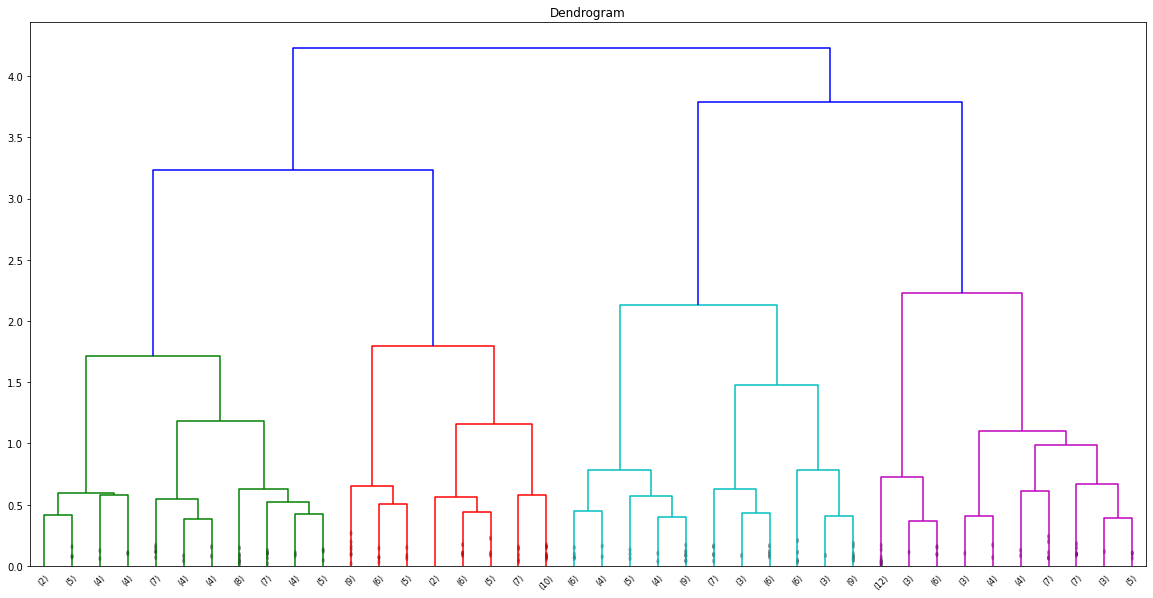

In [450]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    kreduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [455]:
cluster = AgglomerativeClustering(n_clusters=4,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(kreduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1         2  groups
0   -0.137749 -0.006114 -0.005556       3
1   -0.379825 -0.001922  0.011343       3
2    0.065233  0.088096  0.356728       1
3    0.078491  0.320225 -0.439071       0
4    0.181914  0.120319  0.420844       1
5   -0.043386 -0.518912 -0.149270       2
6    0.398995 -0.289621 -0.055692       2
7   -0.308596 -0.240176  0.217312       3
8   -0.332548  0.198963 -0.077766       3
9   -0.073721 -0.368772 -0.047514       2
10  -0.274468  0.091328 -0.233714       3
11   0.086381 -0.217070 -0.440400       2
12  -0.233395  0.218998  0.170538       1
13   0.173366 -0.116497 -0.275316       2
14   0.218369 -0.002385  0.247055       1
15   0.257105  0.411542  0.230129       0
16   0.384490  0.203125 -0.076339       0
17  -0.006188 -0.485282  0.058515       2
18  -0.089620  0.271079  0.332977       1
19  -0.438973  0.032683  0.092430       3
20   0.314574  0.185301  0.091729       0
21   0.260756  0.221351 -0.005484       0
22   0.116269  0.099756 -0.273944       0
23   0.046695 -0.118459 -0.336918       2
24  -0.071350  0.113413  0.445952       1
25  -0.348636 -0.132341  0.185638       3
26  -0.248463  0.310746 -0.300604       3
27   0.111047  0.126017 -0.204114       0
28  -0.076072 -0.429459  0.189439       2
29  -0.210470 -0.010651  0.058703       3
30   0.246601  0.265838  0.319452       1
31  -0.444358  0.150677 -0.048399       3
32   0.423945  0.138619 -0.033648       0
33   0.185840  0.205229 -0.362364       0
34  -0.427138  0.115362 -0.117490       3
35  -0.161548  0.077490  0.420284       1
36  -0.006952  0.101079 -0.507233       0
37  -0.206285  0.060409 -0.054137       3
38  -0.230838 -0.062415  0.454415       1
39  -0.246738 -0.178717  0.329547       1
40  -0.272416 -0.076282 -0.081002       3
41   0.355319 -0.310829 -0.092844       2
42  -0.089806 -0.419655 -0.066386       2
43  -0.441281  0.006510  0.056632       3
44  -0.361705  0.006218 -0.306172       3
45   0.270037 -0.360912 -0.113659       2
46  -0.127816  0.165708 -0.378637       0
47   0.420382  0.314771 -0.076242       0
48  -0.135682 -0.352980  0.057100       2
49  -0.012143 -0.096925 -0.268277       2
50   0.321410  0.351576  0.140207       0
51   0.324259  0.288676 -0.036387       0
52  -0.115798  0.005698  0.367587       1
53   0.486826 -0.165527 -0.025173       2
54  -0.152776  0.074103 -0.349029       0
55  -0.293343 -0.198041 -0.115116       3
56   0.198084  0.326517 -0.115739       0
57   0.207235 -0.332887  0.085399       2
58   0.024707 -0.227137 -0.189221       2
59  -0.379816 -0.139767 -0.137865       3
60  -0.203265 -0.136127 -0.051232       3
61  -0.341039  0.053425  0.291912       1
62   0.164713  0.015051  0.254505       1
63  -0.138306 -0.355971 -0.003359       2
64   0.413697 -0.063593  0.036862       2
65   0.315423 -0.101931  0.121082       2
66  -0.384844 -0.125658  0.049505       3
67  -0.219748  0.017228  0.273895       1
68  -0.294168  0.000695  0.439243       1
69   0.094348 -0.234454  0.012253       2
70   0.212678 -0.186163 -0.215624       2
71   0.135900  0.026412 -0.438131       0
72  -0.176044 -0.177993  0.250935       1
73  -0.219870 -0.099078 -0.328680       3
74  -0.118092 -0.293977  0.187494       2
75   0.007609  0.214159 -0.440282       0
76   0.243777 -0.382462  0.096147       2
77  -0.145974  0.180515  0.135254       1
78  -0.057686  0.103286 -0.180166       0
79  -0.284328  0.275934  0.044903       3
80  -0.343750  0.220103  0.060089       3
81  -0.002736 -0.136911  0.150584       2
82  -0.037785  0.120338  0.220815       1
83  -0.173657 -0.274007 -0.216312       3
84   0.396140 -0.112199 -0.088354       2
85   0.431721 -0.334826 -0.021611       2
86  -0.006593  0.356495 -0.129749       0
87  -0.310079  0.369183 -0.063561       3
88   0.125343  0.122739  0.339293       1
89   0.194069  0.109316 -0.230934       0
90   0.282497 -0.299478  0.148647       2
91   0.006683 -0.263136 -0.054076       2
92  -0.011796  0.385527 -0.427168       0
93  -0.076161  0.041484  0.224229       1
94   0.382718 -0.23459

In [456]:
silhouette_avg = silhouette_score(kreduced, groups) 
silhouette_avg

0.27307358765271184

In [457]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter_3d(
        kreduced_cpy,
        x=0,
        y=1,z=2,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + HDBSCAN 

In [458]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(kreduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
kreduced_cpy = kreduced_cpy.astype({'groups':'category'})
kreduced_cpy

0         1          2         3 groups
0    -0.375510  0.503093  -1.189494  2.671164     10
1    -0.497499  0.139613  -0.518190  0.295166     10
2     0.181946 -2.721558   0.085566  0.108184      2
3    -2.312835  2.657434   0.288640 -0.857920     -1
4    -0.122651 -2.427703  -0.622459 -0.236575      2
5     2.171073  1.193445  -0.859333  0.614748     -1
6     2.764694  0.683095   0.915234 -1.187085      1
7     0.666727 -0.682082  -0.448715  1.396762     -1
8    -1.135921  0.154287   0.579560  0.143164      6
9     1.401608  0.222401   0.304431 -0.406724     10
10   -0.913193  0.835286   0.680478  0.673593     -1
11    1.243679  2.774256   0.219923 -0.725174     -1
12   -1.075489 -0.621513  -0.927284  0.932819      4
13    1.588061  2.888580  -0.851379  0.995256      0
14    0.501711 -1.756441  -0.010540 -0.063421      2
15   -2.649572 -2.611139   0.136524 -1.603226      3
16   -2.234913  0.305590   5.884419  0.583666      3
17    2.473934  0.094487  -0.915907  0.742900     -1
18   -1.134830 -1.927161  -0.315772 -1.157890      4
19   -0.775096 -0.057980  -0.546771  1.169991     10
20   -1.279167 -1.183424   0.141508 -2.133792      3
21   -2.012311 -0.224692  -0.261137 -0.549929      3
22   -0.718048  2.558341  -0.052325  0.672726      0
23    0.355222  1.937765   0.626892  0.100028      0
24   -0.189100 -2.232785  -1.399796  1.045490     -1
25    0.220957 -0.525670  -0.429062  2.020192      8
26   -1.891500  0.919376   0.239282 -0.369732     -1
27   -0.595715  1.441084   0.362622 -0.544584      0
28    2.115845 -0.649384  -0.480192  1.124843     -1
29   -0.032464 -0.301503   0.145053 -0.504141     10
30   -0.971579 -3.956079  -0.001527  0.344865      2
31   -1.134662  0.184457  -0.098968  0.836657      6
32    1.771466 -0.678890   0.604891  2.832850      3
33   -1.438969  2.856012   0.959475 -0.443490     -1
34   -1.074688  0.610348  -0.503566  0.792875      6
35   -0.386052 -1.828338  -0.464346 -0.404519     -1
36   -0.691219  3.143772   0.782593  1.174550     -1
37   -0.567088  0.446823  -0.992326  0.889423     10
38    0.106494 -1.557081  -0.856901  0.820790      7
39    0.718522 -1.217619  -0.223707  0.745198      7
40   -0.198882  0.330567  -0.263408  0.646789     10
41    1.872103  0.580437   0.650431 -2.279952      1
42    1.865660  0.859896  -0.531911  1.543570     10
43   -0.560573 -0.068885  -0.515819  0.458780     10
44   -0.668509  1.252729  -0.016398  0.953213      6
45    2.552907  1.109338  -0.322537 -1.453770      1
46   -1.070014  1.492060   0.504415 -0.896460      6
47   -6.630984 -0.137875   0.869095 -3.479203      3
48    1.162799  0.001276  -0.484838  0.177788     10
49    0.132586  1.537724   0.293601  0.401501      0
50   -4.520340 -3.754614  -0.332994  1.417315      3
51   -2.157236 -0.288801   1.587257 -2.947345      3
52   -0.137683 -1.867720  -0.534835  0.615641     -1
53    3.864648 -0.116797   1.355807 -2.405048      1
54   -0.585458  1.360631   0.279490 -0.828849      6
55    0.299556  0.533916  -0.037517  0.928115     10
56   -1.853399  0.037428   1.720622 -2.620406     -1
57    1.487151 -0.267815   0.503080 -1.012513      1
58    0.908311  0.944271  -0.273765 -1.211154      9
59   -0.053647  0.560131  -0.034190  0.470165     10
60    0.326579  0.193381  -0.674011 -0.065594     10
61   -0.594047 -1.050237  -0.783850  0.578695      8
62    0.741828 -1.691917  -0.593232 -0.290184      2
63    1.205891  0.135921  -0.083994  0.378412     10
64    2.380556 -0.342684  -0.319245 -0.689077      1
65    2.327015 -1.204942  -0.587153  0.685476      1
66   -0.160581  0.023502  -0.464399  0.658593     10
67   -0.247712 -1.005392  -0.072547  0.595639      8
68   -0.135046 -1.572781  -0.756459  1.190112      7
69    0.831293  0.179890  -0.117583 -0.821893     -1
70    1.632535  1.603074  -0.013082 -0.467393     -1
71    0.174278  3.217325  -0.232169 -0.865423      0
72    0.777664 -0.854103  -0.812568  1.297471      7
73    0.047329  1.726599  -0.586883  1.214597      6
74    1.053559 -0.699432  -0.431545 -0

In [459]:
silhouette_avg = silhouette_score(kreduced, labels) 
silhouette_avg

0.10438232299275509

In [460]:
fig = px.scatter_3d(
        kreduced_cpy,
        x=0,
        y=1,z=2,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + RBF-Spectral Clustering 

In [468]:
cluster = SpectralClustering(n_clusters=4).fit(kreduced)
cluster.labels_

array([0, 0, 3, 1, 3, 2, 2, 0, 0, 2, 1, 1, 0, 1, 3, 3, 3, 2, 0, 0, 3, 3,
       1, 1, 0, 0, 1, 1, 2, 0, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       1, 2, 1, 3, 2, 1, 3, 3, 0, 2, 1, 0, 3, 2, 2, 0, 0, 0, 3, 2, 3, 2,
       0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0,
       3, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 0, 2, 3, 0,
       2, 1, 2, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3, 2, 0, 0, 1, 3, 1, 2,
       1, 3, 2, 3, 1, 3, 0, 1, 0, 0, 3, 3, 2, 2, 3, 2, 0, 3, 1, 2, 0, 1,
       0, 2, 0, 1, 3, 2, 2, 3, 0, 3, 0, 1, 1, 2, 3, 3, 0, 3, 2, 1, 0, 3,
       0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 3, 2, 3, 0, 0,
       1, 2, 0, 1, 0, 3, 1, 3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 2, 3, 3, 2])

In [469]:
silhouette_avg = silhouette_score(kreduced, cluster.labels_) 
silhouette_avg

0.3006225687319624

In [470]:
groupsdf = pd.DataFrame(cluster.labels_, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1         2  groups
0   -0.137749 -0.006114 -0.005556       0
1   -0.379825 -0.001922  0.011343       0
2    0.065233  0.088096  0.356728       3
3    0.078491  0.320225 -0.439071       1
4    0.181914  0.120319  0.420844       3
5   -0.043386 -0.518912 -0.149270       2
6    0.398995 -0.289621 -0.055692       2
7   -0.308596 -0.240176  0.217312       0
8   -0.332548  0.198963 -0.077766       0
9   -0.073721 -0.368772 -0.047514       2
10  -0.274468  0.091328 -0.233714       1
11   0.086381 -0.217070 -0.440400       1
12  -0.233395  0.218998  0.170538       0
13   0.173366 -0.116497 -0.275316       1
14   0.218369 -0.002385  0.247055       3
15   0.257105  0.411542  0.230129       3
16   0.384490  0.203125 -0.076339       3
17  -0.006188 -0.485282  0.058515       2
18  -0.089620  0.271079  0.332977       0
19  -0.438973  0.032683  0.092430       0
20   0.314574  0.185301  0.091729       3
21   0.260756  0.221351 -0.005484       3
22   0.116269  0.099756 -0.273944       1
23   0.046695 -0.118459 -0.336918       1
24  -0.071350  0.113413  0.445952       0
25  -0.348636 -0.132341  0.185638       0
26  -0.248463  0.310746 -0.300604       1
27   0.111047  0.126017 -0.204114       1
28  -0.076072 -0.429459  0.189439       2
29  -0.210470 -0.010651  0.058703       0
30   0.246601  0.265838  0.319452       3
31  -0.444358  0.150677 -0.048399       0
32   0.423945  0.138619 -0.033648       3
33   0.185840  0.205229 -0.362364       1
34  -0.427138  0.115362 -0.117490       0
35  -0.161548  0.077490  0.420284       0
36  -0.006952  0.101079 -0.507233       1
37  -0.206285  0.060409 -0.054137       0
38  -0.230838 -0.062415  0.454415       0
39  -0.246738 -0.178717  0.329547       0
40  -0.272416 -0.076282 -0.081002       0
41   0.355319 -0.310829 -0.092844       2
42  -0.089806 -0.419655 -0.066386       2
43  -0.441281  0.006510  0.056632       0
44  -0.361705  0.006218 -0.306172       1
45   0.270037 -0.360912 -0.113659       2
46  -0.127816  0.165708 -0.378637       1
47   0.420382  0.314771 -0.076242       3
48  -0.135682 -0.352980  0.057100       2
49  -0.012143 -0.096925 -0.268277       1
50   0.321410  0.351576  0.140207       3
51   0.324259  0.288676 -0.036387       3
52  -0.115798  0.005698  0.367587       0
53   0.486826 -0.165527 -0.025173       2
54  -0.152776  0.074103 -0.349029       1
55  -0.293343 -0.198041 -0.115116       0
56   0.198084  0.326517 -0.115739       3
57   0.207235 -0.332887  0.085399       2
58   0.024707 -0.227137 -0.189221       2
59  -0.379816 -0.139767 -0.137865       0
60  -0.203265 -0.136127 -0.051232       0
61  -0.341039  0.053425  0.291912       0
62   0.164713  0.015051  0.254505       3
63  -0.138306 -0.355971 -0.003359       2
64   0.413697 -0.063593  0.036862       3
65   0.315423 -0.101931  0.121082       2
66  -0.384844 -0.125658  0.049505       0
67  -0.219748  0.017228  0.273895       0
68  -0.294168  0.000695  0.439243       0
69   0.094348 -0.234454  0.012253       2
70   0.212678 -0.186163 -0.215624       2
71   0.135900  0.026412 -0.438131       1
72  -0.176044 -0.177993  0.250935       0
73  -0.219870 -0.099078 -0.328680       1
74  -0.118092 -0.293977  0.187494       2
75   0.007609  0.214159 -0.440282       1
76   0.243777 -0.382462  0.096147       2
77  -0.145974  0.180515  0.135254       0
78  -0.057686  0.103286 -0.180166       1
79  -0.284328  0.275934  0.044903       0
80  -0.343750  0.220103  0.060089       0
81  -0.002736 -0.136911  0.150584       2
82  -0.037785  0.120338  0.220815       0
83  -0.173657 -0.274007 -0.216312       2
84   0.396140 -0.112199 -0.088354       2
85   0.431721 -0.334826 -0.021611       2
86  -0.006593  0.356495 -0.129749       1
87  -0.310079  0.369183 -0.063561       0
88   0.125343  0.122739  0.339293       3
89   0.194069  0.109316 -0.230934       1
90   0.282497 -0.299478  0.148647       2
91   0.006683 -0.263136 -0.054076       2
92  -0.011796  0.385527 -0.427168       1
93  -0.076161  0.041484  0.224229       0
94   0.382718 -0.23459

In [471]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter_3d(
        kreduced_cpy,
        x=0,
        y=1,z=2,
        color='groups')
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

# RB Clusters

In [472]:
rb_def_vectors = def_vectors_footsep_scaled[def_vectors_footsep_scaled['position']=='RB']

In [473]:
rb_def_vectors.reset_index(inplace=True)
rb_def_vectors.drop(['index'],axis=1,inplace=True)

C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [474]:
rb_def_vectors.head()

player_name            team position  off_val_opp_avg  att_LC_acc  \
0   AaronWanBissaka  Crystal Palace       RB         0.331250   -0.549844   
1    AbdoulayeBamba          Angers       RB         0.477555   -2.037684   
2  AchrafHakimiMouh     Real Madrid       RB         0.435305   -1.045791   
3         AdamSmith     Bournemouth       RB         0.284456    0.512969   
4    AdrianMariappa         Watford       RB         0.789847   -3.029578   

   att_LC_off  att_LC_offcontri  att_LC_pref  att_LF_acc  att_LF_off  \
0    1.235058         -0.685557    -1.231846   -0.869137   -1.236093   
1   -1.771759          0.821015    -1.191084   -0.869137   -0.955754   
2   -1.560203         -0.988530    -0.682688   -0.869137   -0.828457   
3    0.120459         -0.427992    -1.252227    0.612999   -0.011071   
4   -0.750316         -0.037562    -1.128808   -0.127847   -0.741099   

   att_LF_offcontri  att_LF_pref  att_RC_acc  att_RC_off  att_RC_offcontri  \
0         -0.477983    -1.209772    0.427192    2.913445          0.639689   
1         -1.412037    -1.239033   -2.276425    0.880908          0.403081   
2         -0.422916    -1.268293   -0.007566   -0.142249         -1.389501   
3         -0.667783    -1.084448    0.084422   -0.083326          0.248706   
4         -0.579027    -0.759819   -2.142297   -1.343049          0.130243   

   att_RC_pref  att_RF_acc  att_RF_off  att_RF_offcontri  att_RF_pref  \
0    -0.080183    0.116289    0.266244         -0.235964     1.991288   
1     1.756033    0.602456    0.087601          0.765294     1.522169   
2     1.452498    0.527357    0.380625         -0.245992     1.339914   
3     1.229751   -0.008876    0.238207         -0.097243     1.621385   
4     0.182958   -0.892497   -0.100479          0.403395     0.799619   

   foot_right  progaccpass_pm  proginaccpass_pm  
0    0.614169       -0.728879         -0.449269  
1    0.614169       -0.561572          1.168114  
2    0.614169       -0.387730          0.052275  
3    0.614169       -0.393220         -0.029371  
4    0.614169       -1.073948          0.732665

In [475]:
rb_def_vectors = rb_def_vectors.merge(
    def_vectors[['player_name', 'team', 'position', 'footedness']],
    on=['player_name', 'position', 'team'])

## Hierarchical 

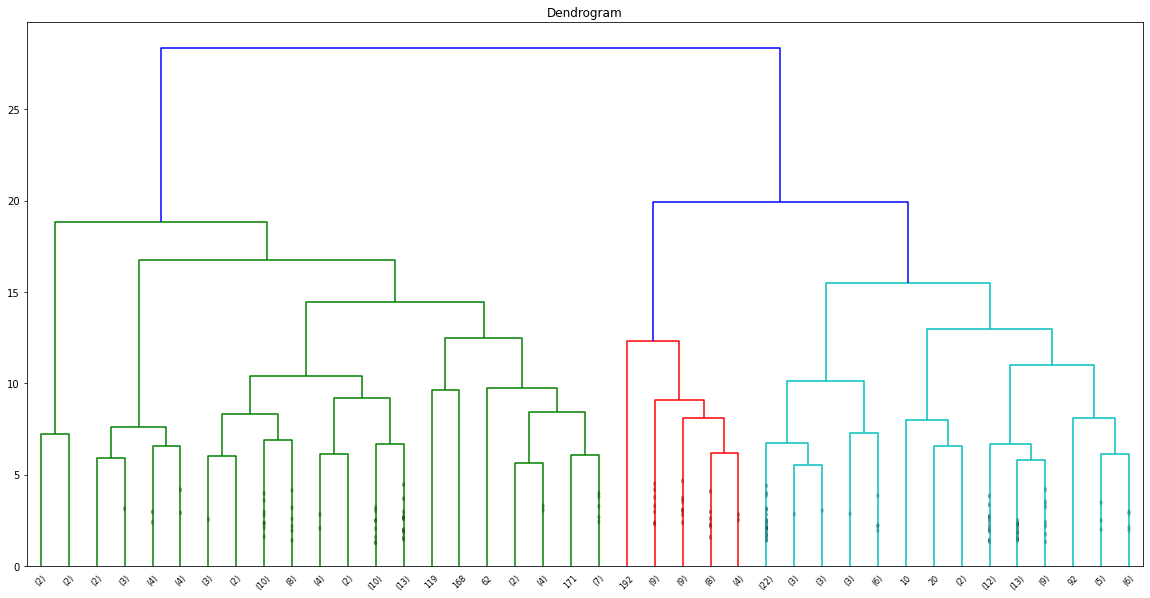

In [476]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    rb_def_vectors[rb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [477]:
cluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    rb_def_vectors[rb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
groups

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0], dtype=int64)

In [478]:
groupsdf = pd.DataFrame(groups, columns=['groups'])
rb_def_vectors_cpy = pd.concat([rb_def_vectors,groupsdf],axis=1)
rb_def_vectors_cpy = rb_def_vectors_cpy.astype({'groups':'category'})
rb_def_vectors_cpy

player_name             team position  \
0                   AaronWanBissaka   Crystal Palace       RB   
1                    AbdoulayeBamba           Angers       RB   
2                  AchrafHakimiMouh      Real Madrid       RB   
3                         AdamSmith      Bournemouth       RB   
4                    AdrianMariappa          Watford       RB   
5                       AlexFerrari    Hellas Verona       RB   
6                AlexisRuanoDelgado           Alavés       RB   
7                    AllanRomeoNyom        West Brom       RB   
8                       AlmamyToure           Monaco       RB   
9           AlvaroOdriozolaArzallus    Real Sociedad       RB   
10              AnaitzArbillaZabala            Eibar       RB   
11               AnderCapaRodriguez            Eibar       RB   
12                   AndreaBarzagli         Juventus       RB   
13                      AndreaConti            Milan       RB   
14                      AndreaRaggi           Monaco       RB   
15                      AndreasBeck        Stuttgart       RB   
16         AntonioBarraganFernandez            Betis       RB   
17                  AntonioRukavina       Villarreal       RB   
18          AritzElustondoIrribaria    Real Sociedad       RB   
19                    ArnaudSouquet             Nice       RB   
20                      AshleyYoung   Manchester Utd       RB   
21                      BacarySagna        Benevento       RB   
22               BartoszBereszynski        Sampdoria       RB   
23                 BenjaminHenrichs       Leverkusen       RB   
24                   BenjaminPavard        Stuttgart       RB   
25   BernardoFernandesdaSilvaJunior       RB Leipzig       RB   
26         BrunoMiguelBoialvoGaspar       Fiorentina       RB   
27                  BrunoSaltorGrau         Brighton       RB   
28                BrunodaSilvaPeres             Roma       RB   
29              CarlosMartinVigaray           Alavés       RB   
30         CedricRicardoAlvesSoares      Southampton       RB   
31           ChidozieCollinsAwaziem           Nantes       RB   
32                  ChristianMaggio           Napoli       RB   
33                  ClementMichelin         Toulouse       RB   
34                      CraigDawson        West Brom       RB   
35        DamianNicolasSuarezSuarez           Getafe       RB   
36               DanielAlvesdaSilva        Paris S-G       RB   
37                  DanielBrosinski         Mainz 05       RB   
38              DanielCarvajalRamos      Real Madrid       RB   
39                DanielTawiahOpare         Augsburg       RB   
40                 DaniloD'Ambrosio            Inter       RB   
41                DaniloLuizdaSilva  Manchester City       RB   
42                     DannySimpson   Leicester City       RB   
43               DannyVieiradaCosta   Eint Frankfurt       RB   
44                     DarylJanmaat          Watford       RB   
45       DavidSimonRodriguezSantana       Las Palmas       RB   
46                   DavideCalabria            Milan       RB   
47                    DeAndreYedlin    Newcastle Utd       RB   
48                  DennisDiekmeier     Hamburger SV       RB   
49                 DimitriFoulquier       Strasbourg       RB   
50                    DjibrilSidibe           Monaco       RB   
51                    EdgarMiguelIe            Lille       RB   
52                 ElseidGezimHysaj           Napoli       RB   
53                       EmilKrafth          Bologna       RB   
54                EnekoBovedaAltube    Athletic Club       RB   
55                EnekoBovedaAltube        La Coruña       RB   
56                       ErnestSeka       Strasbourg       RB   
57               FabrizioCacciatore           Chievo       RB   
58                    FelixEboaEboa         Guingamp       RB   
59               FlorentHadergjonaj     Huddersfield       RB   
60                      FouadChafik            Dijon       

In [479]:
silhouette_avg = silhouette_score(rb_def_vectors[rb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, groups) 
silhouette_avg

0.13070932222714152

In [480]:
standard_embedding = umap.UMAP(
    random_state=np.random.RandomState(42)).fit_transform(
        rb_def_vectors[rb_def_vectors.columns.difference([
            'player_name', 'team', 'position', 'off_val_opp_avg', 'footedness'
        ])].values)

In [481]:
plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        plot,
        x=1,
        y=2,
        color=3)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## HDBSCAN 

In [482]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(rb_def_vectors[rb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

In [483]:
groupsdf = pd.DataFrame(labels, columns=['groups'])
rb_def_vectors_cpy = pd.concat([rb_def_vectors,groupsdf],axis=1)
rb_def_vectors_cpy = rb_def_vectors_cpy.astype({'groups':'category'})
rb_def_vectors_cpy

player_name             team position  \
0                   AaronWanBissaka   Crystal Palace       RB   
1                    AbdoulayeBamba           Angers       RB   
2                  AchrafHakimiMouh      Real Madrid       RB   
3                         AdamSmith      Bournemouth       RB   
4                    AdrianMariappa          Watford       RB   
5                       AlexFerrari    Hellas Verona       RB   
6                AlexisRuanoDelgado           Alavés       RB   
7                    AllanRomeoNyom        West Brom       RB   
8                       AlmamyToure           Monaco       RB   
9           AlvaroOdriozolaArzallus    Real Sociedad       RB   
10              AnaitzArbillaZabala            Eibar       RB   
11               AnderCapaRodriguez            Eibar       RB   
12                   AndreaBarzagli         Juventus       RB   
13                      AndreaConti            Milan       RB   
14                      AndreaRaggi           Monaco       RB   
15                      AndreasBeck        Stuttgart       RB   
16         AntonioBarraganFernandez            Betis       RB   
17                  AntonioRukavina       Villarreal       RB   
18          AritzElustondoIrribaria    Real Sociedad       RB   
19                    ArnaudSouquet             Nice       RB   
20                      AshleyYoung   Manchester Utd       RB   
21                      BacarySagna        Benevento       RB   
22               BartoszBereszynski        Sampdoria       RB   
23                 BenjaminHenrichs       Leverkusen       RB   
24                   BenjaminPavard        Stuttgart       RB   
25   BernardoFernandesdaSilvaJunior       RB Leipzig       RB   
26         BrunoMiguelBoialvoGaspar       Fiorentina       RB   
27                  BrunoSaltorGrau         Brighton       RB   
28                BrunodaSilvaPeres             Roma       RB   
29              CarlosMartinVigaray           Alavés       RB   
30         CedricRicardoAlvesSoares      Southampton       RB   
31           ChidozieCollinsAwaziem           Nantes       RB   
32                  ChristianMaggio           Napoli       RB   
33                  ClementMichelin         Toulouse       RB   
34                      CraigDawson        West Brom       RB   
35        DamianNicolasSuarezSuarez           Getafe       RB   
36               DanielAlvesdaSilva        Paris S-G       RB   
37                  DanielBrosinski         Mainz 05       RB   
38              DanielCarvajalRamos      Real Madrid       RB   
39                DanielTawiahOpare         Augsburg       RB   
40                 DaniloD'Ambrosio            Inter       RB   
41                DaniloLuizdaSilva  Manchester City       RB   
42                     DannySimpson   Leicester City       RB   
43               DannyVieiradaCosta   Eint Frankfurt       RB   
44                     DarylJanmaat          Watford       RB   
45       DavidSimonRodriguezSantana       Las Palmas       RB   
46                   DavideCalabria            Milan       RB   
47                    DeAndreYedlin    Newcastle Utd       RB   
48                  DennisDiekmeier     Hamburger SV       RB   
49                 DimitriFoulquier       Strasbourg       RB   
50                    DjibrilSidibe           Monaco       RB   
51                    EdgarMiguelIe            Lille       RB   
52                 ElseidGezimHysaj           Napoli       RB   
53                       EmilKrafth          Bologna       RB   
54                EnekoBovedaAltube    Athletic Club       RB   
55                EnekoBovedaAltube        La Coruña       RB   
56                       ErnestSeka       Strasbourg       RB   
57               FabrizioCacciatore           Chievo       RB   
58                    FelixEboaEboa         Guingamp       RB   
59               FlorentHadergjonaj     Huddersfield       RB   
60                      FouadChafik            Dijon       

In [484]:
silhouette_avg = silhouette_score(rb_def_vectors[rb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, labels) 
silhouette_avg

-0.16187030131939997

## RBF-Spectral Clustering 

In [489]:
cluster = SpectralClustering(n_clusters=3).fit(
    rb_def_vectors[rb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [490]:
silhouette_avg = silhouette_score(rb_def_vectors[rb_def_vectors.columns.difference(
        ['player_name', 'team', 'position', 'off_val_opp_avg',
         'footedness'])].values, cluster.labels_) 
silhouette_avg

0.16860654866887992

## PCA + Hierarchical 

In [492]:
pca = PCA(n_components=2)
pca.fit(rb_def_vectors[rb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
pca.explained_variance_ratio_

array([0.23684053, 0.20460895])

In [493]:
reduced = pca.transform(rb_def_vectors[rb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

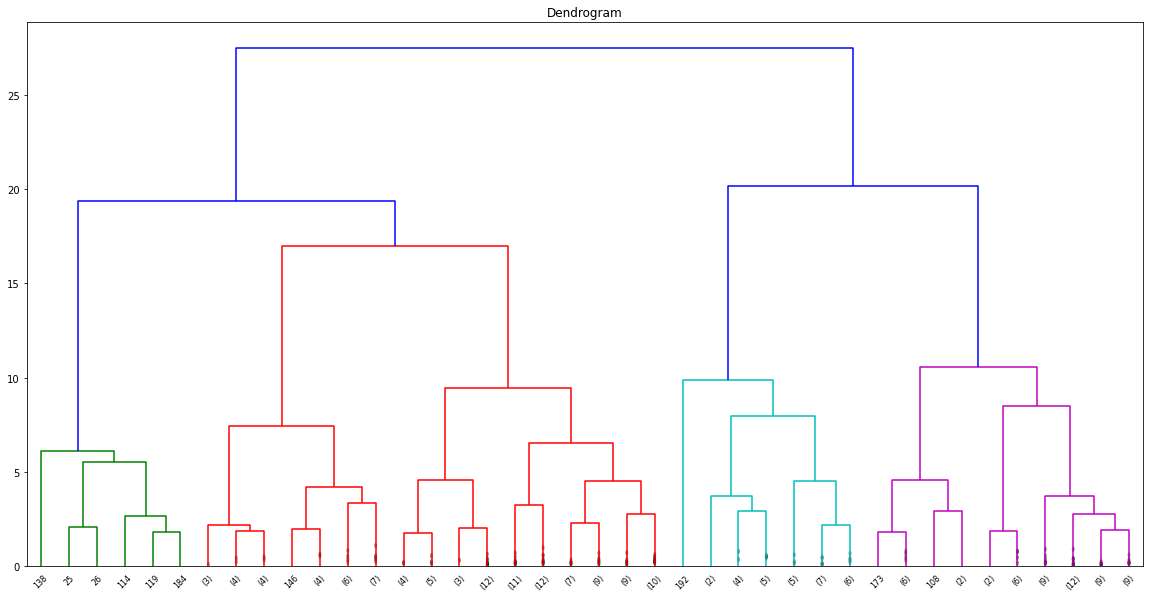

In [494]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    reduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [497]:
cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(
    reduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
redcued_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1  groups
0    0.126029  0.522890       1
1    0.726978 -3.227904       4
2    0.138858 -1.897698       4
3   -1.445650 -0.127978       0
4    0.147780 -3.085435       4
5   -0.657504 -0.772966       0
6   -0.900528 -1.755721       4
7    1.543873  0.764357       1
8   -2.461766  2.760822       2
9    0.935909  2.944849       2
10  -0.733617 -2.409695       4
11  -1.371946  0.009751       0
12   1.011701 -1.055145       1
13  -3.016643  2.961152       2
14   3.316568 -3.516353       4
15   1.291587 -1.825374       4
16  -0.642290  0.685031       1
17   1.131181  2.155184       2
18  -4.816179 -0.826993       0
19   0.349046  1.693533       2
20  -2.582186  0.813686       0
21   1.092445  0.631985       1
22   1.386194 -0.175106       1
23   2.826851  0.032466       1
24  -1.652772 -0.786900       0
25   5.901780 -0.744501       3
26   7.113183  0.901617       3
27  -0.764296 -0.752124       0
28  -1.360269  1.724889       2
29   1.688294 -2.356089       4
30  -0.077230 -0.150581       1
31  -0.706637 -0.843401       0
32  -3.019401 -1.327791       0
33  -1.940880  3.450417       2
34  -1.487091 -0.724593       0
35  -0.237363  0.330005       1
36  -0.721788  0.656283       1
37   1.959915 -0.179750       1
38  -1.079719  1.122971       2
39   0.826468  0.431178       1
40   0.486508  0.260972       1
41  -0.608385  0.475693       1
42  -0.616945 -1.282740       1
43   1.305412  1.230897       1
44  -0.885131  0.164301       0
45   1.482397 -0.194498       1
46   0.012082 -0.424279       1
47  -0.171955  0.471756       1
48  -3.644379  1.345846       0
49   0.141071  0.075384       1
50   1.913254  1.341248       1
51   0.749208 -1.805544       4
52  -0.841890 -0.872469       0
53   0.629347  1.266008       1
54   1.268096  1.231350       1
55   1.428587  0.433824       1
56  -0.901436 -0.693666       0
57   1.097945 -0.100318       1
58   1.144776 -0.958278       1
59   0.461199  0.734980       1
60   2.831080 -0.097345       1
61  -2.867373  1.152488       0
62   2.459705 -2.442804       4
63  -1.575196 -1.131327       0
64  -0.035935 -0.966738       1
65  -2.014778 -2.214665       0
66  -0.280102 -2.752990       4
67   1.258438  0.450970       1
68  -1.232768 -0.075799       0
69  -1.171114 -0.793679       0
70  -1.808680 -0.063404       0
71  -0.883569 -0.676325       0
72  -1.739035  0.495419       0
73  -0.924657 -0.707914       0
74   0.301060 -0.247526       1
75   1.548242  0.790840       1
76   1.135230  0.139767       1
77  -1.865582  3.194976       2
78   1.561027 -3.454060       4
79   0.093206 -0.209619       1
80  -1.121070 -0.868203       0
81  -0.565738  0.714268       1
82  -1.915723 -1.364239       0
83   1.480129 -3.222761       4
84   2.090518 -0.309021       1
85   0.812282 -0.969542       1
86   1.234900  2.481144       2
87   1.061963 -0.086817       1
88  -4.690224 -0.543571       0
89   1.275209  1.286531       1
90   0.481475 -3.707608       4
91  -0.954668  0.292629       0
92  -0.899808 -0.349248       0
93   0.618094 -1.219432       1
94  -1.372803  1.198734       2
95   0.999662  1.128348       1
96  -0.147003  0.263090       1
97   2.232742  0.504578       1
98   2.036101  1.064940       1
99  -3.581378 -2.396831       0
100 -1.490453 -0.693634       0
101  0.819372 -0.499328       1
102 -0.929265  1.641045       2
103 -0.759472 -0.373398       0
104 -1.104119 -0.820691       0
105  1.369050 -0.777139       1
106 -1.617502  0.683983       0
107 -0.015202  0.012987       1
108 -5.318143  1.795582       0
109  2.431132  1.345167       1
110 -0.851509 -0.734566       0
111  1.235294  0.627090       1
112 -1.552171 -0.453572       0
113 -0.873915  2.321458       2
114  5.817234  2.659850       3
115 -0.376915  0.973123       1
116  0.573375 -2.305233       4
117  0.914673 -1.229775       1
118  0.462176  0.975173       1
119  3.524988  3.869084       3
120 -1.033763 -0.266809       0
121  1.265333 -1.276311       1
122 -1.267374  2.266050       2
123  0.333500  0.536479       1
124 -1.31196

In [498]:
silhouette_avg = silhouette_score(reduced, groups) 
silhouette_avg

0.34235473978975867

In [499]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        reduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## PCA + HDBSCAN 

In [500]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(reduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
reduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
reduced_cpy = reduced_cpy.astype({'groups':'category'})
reduced_cpy

0         1 groups
0    0.126029  0.522890      6
1    0.726978 -3.227904      3
2    0.138858 -1.897698      6
3   -1.445650 -0.127978      8
4    0.147780 -3.085435     -1
5   -0.657504 -0.772966      7
6   -0.900528 -1.755721     -1
7    1.543873  0.764357      6
8   -2.461766  2.760822     -1
9    0.935909  2.944849     -1
10  -0.733617 -2.409695     -1
11  -1.371946  0.009751      8
12   1.011701 -1.055145      6
13  -3.016643  2.961152     -1
14   3.316568 -3.516353     -1
15   1.291587 -1.825374      4
16  -0.642290  0.685031      6
17   1.131181  2.155184     -1
18  -4.816179 -0.826993     -1
19   0.349046  1.693533     -1
20  -2.582186  0.813686     -1
21   1.092445  0.631985      6
22   1.386194 -0.175106      6
23   2.826851  0.032466      1
24  -1.652772 -0.786900      7
25   5.901780 -0.744501     -1
26   7.113183  0.901617     -1
27  -0.764296 -0.752124      7
28  -1.360269  1.724889      2
29   1.688294 -2.356089     -1
30  -0.077230 -0.150581      6
31  -0.706637 -0.843401      7
32  -3.019401 -1.327791      0
33  -1.940880  3.450417     -1
34  -1.487091 -0.724593      7
35  -0.237363  0.330005      6
36  -0.721788  0.656283      6
37   1.959915 -0.179750      6
38  -1.079719  1.122971      2
39   0.826468  0.431178      6
40   0.486508  0.260972      6
41  -0.608385  0.475693      6
42  -0.616945 -1.282740     -1
43   1.305412  1.230897      5
44  -0.885131  0.164301      8
45   1.482397 -0.194498      6
46   0.012082 -0.424279      6
47  -0.171955  0.471756      6
48  -3.644379  1.345846     -1
49   0.141071  0.075384      6
50   1.913254  1.341248     -1
51   0.749208 -1.805544      4
52  -0.841890 -0.872469      7
53   0.629347  1.266008     -1
54   1.268096  1.231350      5
55   1.428587  0.433824      6
56  -0.901436 -0.693666      7
57   1.097945 -0.100318      6
58   1.144776 -0.958278      6
59   0.461199  0.734980      6
60   2.831080 -0.097345      1
61  -2.867373  1.152488     -1
62   2.459705 -2.442804     -1
63  -1.575196 -1.131327     -1
64  -0.035935 -0.966738      6
65  -2.014778 -2.214665      0
66  -0.280102 -2.752990     -1
67   1.258438  0.450970      6
68  -1.232768 -0.075799      8
69  -1.171114 -0.793679      7
70  -1.808680 -0.063404     -1
71  -0.883569 -0.676325      7
72  -1.739035  0.495419     -1
73  -0.924657 -0.707914      7
74   0.301060 -0.247526      6
75   1.548242  0.790840      6
76   1.135230  0.139767      6
77  -1.865582  3.194976     -1
78   1.561027 -3.454060      3
79   0.093206 -0.209619      6
80  -1.121070 -0.868203      7
81  -0.565738  0.714268      6
82  -1.915723 -1.364239     -1
83   1.480129 -3.222761      3
84   2.090518 -0.309021      6
85   0.812282 -0.969542      6
86   1.234900  2.481144     -1
87   1.061963 -0.086817      6
88  -4.690224 -0.543571     -1
89   1.275209  1.286531      5
90   0.481475 -3.707608     -1
91  -0.954668  0.292629      8
92  -0.899808 -0.349248      8
93   0.618094 -1.219432      6
94  -1.372803  1.198734      2
95   0.999662  1.128348      5
96  -0.147003  0.263090      6
97   2.232742  0.504578      1
98   2.036101  1.064940     -1
99  -3.581378 -2.396831      0
100 -1.490453 -0.693634      7
101  0.819372 -0.499328      6
102 -0.929265  1.641045      2
103 -0.759472 -0.373398      8
104 -1.104119 -0.820691      7
105  1.369050 -0.777139      6
106 -1.617502  0.683983     -1
107 -0.015202  0.012987      6
108 -5.318143  1.795582     -1
109  2.431132  1.345167     -1
110 -0.851509 -0.734566      7
111  1.235294  0.627090      6
112 -1.552171 -0.453572      7
113 -0.873915  2.321458      2
114  5.817234  2.659850     -1
115 -0.376915  0.973123      6
116  0.573375 -2.305233      4
117  0.914673 -1.229775      6
118  0.462176  0.975173      6
119  3.524988  3.869084     -1
120 -1.033763 -0.266809      8
121  1.265333 -1.276311      6
122 -1.267374  2.266050      2
123  0.333500  0.536479      6
124 -1.311961 -0.882307      7
125  1.420042 -1.093712      6
126  1.131656 -1.936871      4
127 -1.923567  2.059010     -1
128  0.539219

In [501]:
fig = px.scatter(
        reduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

In [502]:
silhouette_avg = silhouette_score(reduced, labels) 
silhouette_avg

-0.0604308029309294

## Kernel PCA + Hierarchical

In [504]:
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca.fit(rb_def_vectors[rb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)
kpca.lambdas_

array([13.22086123, 12.25397792])

In [505]:
kreduced = kpca.transform(rb_def_vectors[rb_def_vectors.columns.difference(
    ['player_name', 'team', 'position', 'off_val_opp_avg',
     'footedness'])].values)

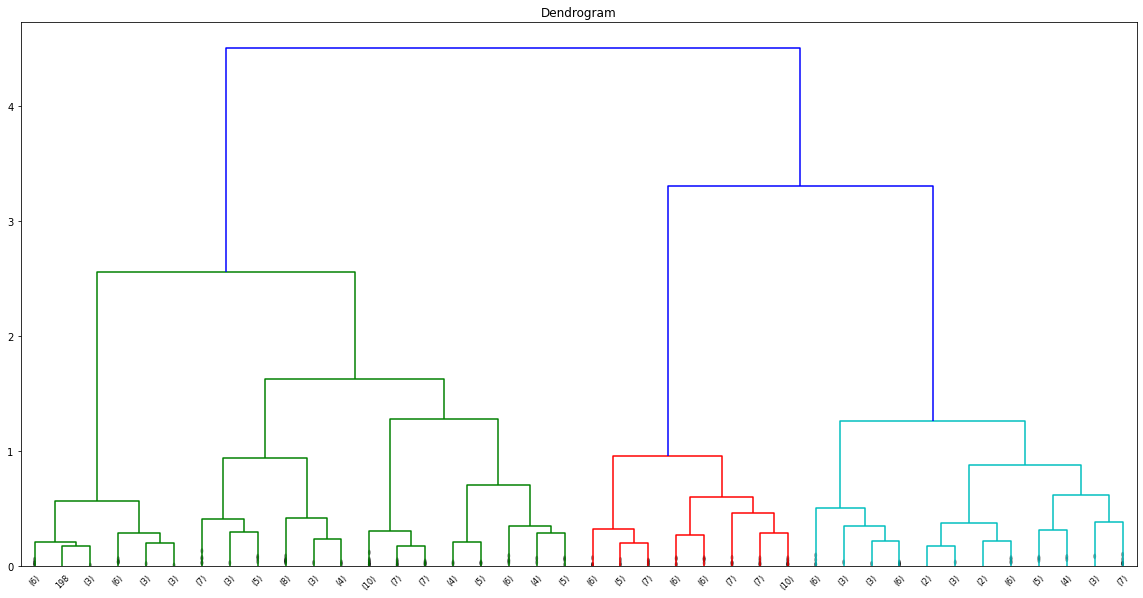

In [506]:
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(
    kreduced,
    method='ward',
    metric='euclidean'),
                       truncate_mode='lastp',
                       p=40,
                       show_contracted=True)

In [513]:
cluster = AgglomerativeClustering(n_clusters=3,
                                  affinity='euclidean',
                                  linkage='ward')
groups = cluster.fit_predict(kreduced)
groupsdf = pd.DataFrame(groups, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1  groups
0    0.131321  0.023913       0
1    0.106044 -0.234951       0
2   -0.018346 -0.244095       0
3   -0.399190  0.096086       2
4    0.061722 -0.137051       0
5   -0.268689 -0.114396       2
6   -0.087347 -0.050863       0
7    0.195096 -0.266188       0
8   -0.008599  0.485148       1
9    0.290453  0.209944       0
10   0.357957  0.237689       0
11  -0.352345  0.093132       2
12   0.330582 -0.110176       0
13   0.167316  0.534273       1
14   0.412443 -0.061227       0
15   0.034559 -0.519756       0
16  -0.291312  0.040993       2
17   0.347912  0.064418       0
18  -0.042691  0.440993       1
19  -0.018313  0.060498       1
20   0.287825  0.280652       0
21   0.154359 -0.170309       0
22   0.107445 -0.328899       0
23   0.355465 -0.188663       0
24  -0.432531  0.054901       2
25   0.482543  0.107057       0
26   0.472973  0.186820       0
27  -0.357914 -0.146439       2
28  -0.181429  0.359339       1
29   0.311162 -0.198119       0
30  -0.259005 -0.159628       2
31  -0.173262 -0.085528       2
32   0.110325  0.272124       1
33   0.178990  0.481002       1
34  -0.476974 -0.005867       2
35  -0.235171 -0.123234       2
36  -0.002379  0.174185       1
37   0.233152 -0.032692       0
38  -0.158120  0.272348       1
39  -0.017800 -0.137396       0
40  -0.044310 -0.174541       0
41   0.181255  0.206920       1
42  -0.319095 -0.203027       2
43   0.354162  0.027502       0
44  -0.346186 -0.014555       2
45   0.324148 -0.081479       0
46  -0.283825 -0.255353       2
47  -0.274443 -0.097245       2
48  -0.175089  0.526066       1
49   0.030890 -0.003457       0
50   0.301194 -0.128157       0
51  -0.007221 -0.414696       0
52  -0.166943 -0.013844       2
53   0.110966 -0.037451       0
54   0.196409  0.000322       0
55   0.256988 -0.154024       0
56  -0.229679 -0.018961       2
57   0.074647 -0.177783       0
58   0.291460 -0.141278       0
59  -0.112991 -0.096628       0
60   0.324961 -0.405541       0
61  -0.185672  0.494810       1
62   0.388320  0.164381       0
63  -0.465880 -0.017150       2
64  -0.097580 -0.237559       0
65  -0.264510  0.040285       2
66  -0.041257 -0.151608       0
67   0.313726 -0.076834       0
68  -0.326313  0.058718       2
69  -0.073185  0.041243       1
70  -0.363142  0.189716       1
71  -0.401155 -0.128810       2
72  -0.183389  0.253571       1
73  -0.280807 -0.065985       2
74  -0.182932 -0.249008       2
75   0.265338 -0.162218       0
76   0.292673 -0.057715       0
77   0.043690  0.520635       1
78   0.330570 -0.157192       0
79  -0.249526 -0.214085       2
80  -0.407098 -0.085604       2
81  -0.282789  0.043741       2
82  -0.097076  0.162444       1
83   0.285305 -0.272053       0
84   0.228795 -0.385219       0
85   0.018530 -0.420922       0
86   0.339023  0.144575       0
87   0.321805 -0.118130       0
88  -0.052467  0.446778       1
89   0.300764 -0.038526       0
90   0.222845 -0.062231       0
91  -0.174672  0.102863       1
92   0.294984  0.213767       0
93  -0.064549 -0.316885       0
94  -0.192402  0.287102       1
95   0.192630 -0.093576       0
96  -0.242161 -0.134506       2
97   0.271220 -0.297046       0
98   0.382293 -0.177899       0
99  -0.069948  0.259716       1
100 -0.398632  0.018603       2
101 -0.001622 -0.389983       0
102 -0.008590  0.283868       1
103 -0.411499 -0.115683       2
104 -0.347483 -0.022016       2
105  0.035580 -0.445864       0
106 -0.282003  0.240939       1
107 -0.254492 -0.163782       2
108  0.099517  0.550405       1
109  0.299701 -0.122450       0
110 -0.224054  0.003059       2
111  0.384611  0.044455       0
112 -0.423750  0.050478       2
113  0.068724  0.372800       1
114  0.477095  0.192044       0
115 -0.257173  0.028243       2
116 -0.090685 -0.411866       0
117 -0.041416 -0.467405       0
118 -0.101420 -0.065720       0
119  0.394576  0.244660       0
120 -0.382627  0.002134       2
121  0.135079 -0.332960       0
122  0.009000  0.379117       1
123 -0.142292 -0.136079       2
124 -0.10083

In [514]:
silhouette_avg = silhouette_score(kreduced, groups) 
silhouette_avg

0.3969384288577496

In [515]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        kreduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + HDBSCAN 

In [516]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(kreduced)
groupsdf = pd.DataFrame(labels, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(reduced),groupsdf],axis=1)
kreduced_cpy = kreduced_cpy.astype({'groups':'category'})
kreduced_cpy

0         1 groups
0    0.126029  0.522890     -1
1    0.726978 -3.227904      7
2    0.138858 -1.897698      7
3   -1.445650 -0.127978      8
4    0.147780 -3.085435     -1
5   -0.657504 -0.772966      8
6   -0.900528 -1.755721      8
7    1.543873  0.764357      7
8   -2.461766  2.760822      0
9    0.935909  2.944849      1
10  -0.733617 -2.409695      1
11  -1.371946  0.009751      8
12   1.011701 -1.055145     10
13  -3.016643  2.961152      0
14   3.316568 -3.516353     -1
15   1.291587 -1.825374     -1
16  -0.642290  0.685031      8
17   1.131181  2.155184      2
18  -4.816179 -0.826993      0
19   0.349046  1.693533     -1
20  -2.582186  0.813686      1
21   1.092445  0.631985     -1
22   1.386194 -0.175106      7
23   2.826851  0.032466     10
24  -1.652772 -0.786900      8
25   5.901780 -0.744501     -1
26   7.113183  0.901617     -1
27  -0.764296 -0.752124      8
28  -1.360269  1.724889      4
29   1.688294 -2.356089     10
30  -0.077230 -0.150581      8
31  -0.706637 -0.843401      8
32  -3.019401 -1.327791     -1
33  -1.940880  3.450417     -1
34  -1.487091 -0.724593     -1
35  -0.237363  0.330005      8
36  -0.721788  0.656283     -1
37   1.959915 -0.179750      9
38  -1.079719  1.122971      4
39   0.826468  0.431178      6
40   0.486508  0.260972      6
41  -0.608385  0.475693     -1
42  -0.616945 -1.282740      8
43   1.305412  1.230897      2
44  -0.885131  0.164301      8
45   1.482397 -0.194498     10
46   0.012082 -0.424279      8
47  -0.171955  0.471756      8
48  -3.644379  1.345846     -1
49   0.141071  0.075384     -1
50   1.913254  1.341248     10
51   0.749208 -1.805544      5
52  -0.841890 -0.872469      8
53   0.629347  1.266008     -1
54   1.268096  1.231350     -1
55   1.428587  0.433824     10
56  -0.901436 -0.693666      8
57   1.097945 -0.100318      7
58   1.144776 -0.958278     10
59   0.461199  0.734980      8
60   2.831080 -0.097345     -1
61  -2.867373  1.152488     -1
62   2.459705 -2.442804      2
63  -1.575196 -1.131327     -1
64  -0.035935 -0.966738      8
65  -2.014778 -2.214665      8
66  -0.280102 -2.752990      6
67   1.258438  0.450970     10
68  -1.232768 -0.075799      8
69  -1.171114 -0.793679     -1
70  -1.808680 -0.063404     -1
71  -0.883569 -0.676325      8
72  -1.739035  0.495419      4
73  -0.924657 -0.707914      8
74   0.301060 -0.247526      8
75   1.548242  0.790840     10
76   1.135230  0.139767     10
77  -1.865582  3.194976      0
78   1.561027 -3.454060     10
79   0.093206 -0.209619      8
80  -1.121070 -0.868203      8
81  -0.565738  0.714268      8
82  -1.915723 -1.364239     -1
83   1.480129 -3.222761     -1
84   2.090518 -0.309021     -1
85   0.812282 -0.969542      5
86   1.234900  2.481144      2
87   1.061963 -0.086817     10
88  -4.690224 -0.543571      0
89   1.275209  1.286531     10
90   0.481475 -3.707608      9
91  -0.954668  0.292629      4
92  -0.899808 -0.349248      1
93   0.618094 -1.219432      8
94  -1.372803  1.198734      4
95   0.999662  1.128348      9
96  -0.147003  0.263090      8
97   2.232742  0.504578     -1
98   2.036101  1.064940     10
99  -3.581378 -2.396831      3
100 -1.490453 -0.693634      8
101  0.819372 -0.499328      5
102 -0.929265  1.641045      3
103 -0.759472 -0.373398      8
104 -1.104119 -0.820691      8
105  1.369050 -0.777139      5
106 -1.617502  0.683983      4
107 -0.015202  0.012987      8
108 -5.318143  1.795582      0
109  2.431132  1.345167     10
110 -0.851509 -0.734566      8
111  1.235294  0.627090      2
112 -1.552171 -0.453572      8
113 -0.873915  2.321458      0
114  5.817234  2.659850     -1
115 -0.376915  0.973123      8
116  0.573375 -2.305233      5
117  0.914673 -1.229775      5
118  0.462176  0.975173      8
119  3.524988  3.869084      1
120 -1.033763 -0.266809      8
121  1.265333 -1.276311      7
122 -1.267374  2.266050      0
123  0.333500  0.536479      8
124 -1.311961 -0.882307     -1
125  1.420042 -1.093712      7
126  1.131656 -1.936871      7
127 -1.923567  2.059010      0
128  0.539219

In [517]:
silhouette_avg = silhouette_score(kreduced, labels) 
silhouette_avg

0.13031013494493499

In [518]:
fig = px.scatter(
        kreduced_cpy,
        x=0,
        y=1,
        color=groups)
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

## Kernel PCA + RBF-Spectral Clustering 

In [519]:
cluster = SpectralClustering(n_clusters=3).fit(kreduced)
cluster.labels_

array([0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0,
       2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0,
       2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 2])

In [520]:
silhouette_avg = silhouette_score(kreduced, cluster.labels_) 
silhouette_avg

0.44248315545955585

In [521]:
groupsdf = pd.DataFrame(cluster.labels_, columns=['groups'])
kreduced_cpy = pd.concat([pd.DataFrame(kreduced), groupsdf], axis=1)
kredcued_cpy = reduced_cpy.astype({'groups': 'category'})
kreduced_cpy

0         1  groups
0    0.131321  0.023913       0
1    0.106044 -0.234951       0
2   -0.018346 -0.244095       2
3   -0.399190  0.096086       2
4    0.061722 -0.137051       0
5   -0.268689 -0.114396       2
6   -0.087347 -0.050863       2
7    0.195096 -0.266188       0
8   -0.008599  0.485148       1
9    0.290453  0.209944       1
10   0.357957  0.237689       1
11  -0.352345  0.093132       2
12   0.330582 -0.110176       0
13   0.167316  0.534273       1
14   0.412443 -0.061227       0
15   0.034559 -0.519756       0
16  -0.291312  0.040993       2
17   0.347912  0.064418       0
18  -0.042691  0.440993       1
19  -0.018313  0.060498       2
20   0.287825  0.280652       1
21   0.154359 -0.170309       0
22   0.107445 -0.328899       0
23   0.355465 -0.188663       0
24  -0.432531  0.054901       2
25   0.482543  0.107057       0
26   0.472973  0.186820       0
27  -0.357914 -0.146439       2
28  -0.181429  0.359339       1
29   0.311162 -0.198119       0
30  -0.259005 -0.159628       2
31  -0.173262 -0.085528       2
32   0.110325  0.272124       1
33   0.178990  0.481002       1
34  -0.476974 -0.005867       2
35  -0.235171 -0.123234       2
36  -0.002379  0.174185       1
37   0.233152 -0.032692       0
38  -0.158120  0.272348       1
39  -0.017800 -0.137396       2
40  -0.044310 -0.174541       2
41   0.181255  0.206920       1
42  -0.319095 -0.203027       2
43   0.354162  0.027502       0
44  -0.346186 -0.014555       2
45   0.324148 -0.081479       0
46  -0.283825 -0.255353       2
47  -0.274443 -0.097245       2
48  -0.175089  0.526066       1
49   0.030890 -0.003457       0
50   0.301194 -0.128157       0
51  -0.007221 -0.414696       0
52  -0.166943 -0.013844       2
53   0.110966 -0.037451       0
54   0.196409  0.000322       0
55   0.256988 -0.154024       0
56  -0.229679 -0.018961       2
57   0.074647 -0.177783       0
58   0.291460 -0.141278       0
59  -0.112991 -0.096628       2
60   0.324961 -0.405541       0
61  -0.185672  0.494810       1
62   0.388320  0.164381       0
63  -0.465880 -0.017150       2
64  -0.097580 -0.237559       2
65  -0.264510  0.040285       2
66  -0.041257 -0.151608       2
67   0.313726 -0.076834       0
68  -0.326313  0.058718       2
69  -0.073185  0.041243       2
70  -0.363142  0.189716       2
71  -0.401155 -0.128810       2
72  -0.183389  0.253571       1
73  -0.280807 -0.065985       2
74  -0.182932 -0.249008       2
75   0.265338 -0.162218       0
76   0.292673 -0.057715       0
77   0.043690  0.520635       1
78   0.330570 -0.157192       0
79  -0.249526 -0.214085       2
80  -0.407098 -0.085604       2
81  -0.282789  0.043741       2
82  -0.097076  0.162444       1
83   0.285305 -0.272053       0
84   0.228795 -0.385219       0
85   0.018530 -0.420922       0
86   0.339023  0.144575       0
87   0.321805 -0.118130       0
88  -0.052467  0.446778       1
89   0.300764 -0.038526       0
90   0.222845 -0.062231       0
91  -0.174672  0.102863       2
92   0.294984  0.213767       1
93  -0.064549 -0.316885       2
94  -0.192402  0.287102       1
95   0.192630 -0.093576       0
96  -0.242161 -0.134506       2
97   0.271220 -0.297046       0
98   0.382293 -0.177899       0
99  -0.069948  0.259716       1
100 -0.398632  0.018603       2
101 -0.001622 -0.389983       0
102 -0.008590  0.283868       1
103 -0.411499 -0.115683       2
104 -0.347483 -0.022016       2
105  0.035580 -0.445864       0
106 -0.282003  0.240939       1
107 -0.254492 -0.163782       2
108  0.099517  0.550405       1
109  0.299701 -0.122450       0
110 -0.224054  0.003059       2
111  0.384611  0.044455       0
112 -0.423750  0.050478       2
113  0.068724  0.372800       1
114  0.477095  0.192044       0
115 -0.257173  0.028243       2
116 -0.090685 -0.411866       2
117 -0.041416 -0.467405       2
118 -0.101420 -0.065720       2
119  0.394576  0.244660       1
120 -0.382627  0.002134       2
121  0.135079 -0.332960       0
122  0.009000  0.379117       1
123 -0.142292 -0.136079       2
124 -0.10083

In [522]:
#plot = pd.DataFrame(data={1:standard_embedding[:,0], 2:standard_embedding[:,1], 3:groups})
fig = px.scatter(
        kreduced_cpy,
        x=0,
        y=1,
        color='groups')
        #hover_data=['player_name', 'team', 'position', 'footedness'])
fig.show()

# Merging the groups to lineups

In [ ]:
four_clusters = ['rlll', 'rrll', 'rrlr', 'rrrl', 'rrrr']
df_fourclusters = pd.concat(
    (pd.read_pickle(f'../data/clusters/clusters_vaep/cluster_{i}.pkl')
     for i in four_clusters),
    axis=0)

In [ ]:
df_4clusters_team=pd.DataFrame(df_fourclusters.groupby(['team','RB','R_CB','L_CB','LB'])['wyId'].count())

In [ ]:
df_4clusters_team.reset_index(inplace=True)

In [ ]:
df_4clusters_team[df_4clusters_team['team'].str.contains("Chelsea")]

In [ ]:
 player_map = {  'RamiroFunesMori': 'JoseRamiroFunesMori',
                'KurtZouma': 'KurtHappyZouma',
                'Danilo': 'DaniloLuizdaSilva',
                'CesarAzpilicueta': 'CesarAzpilicuetaTanco',
                'EzequielSchelotto': 'MatiasEzequielSchelotto',
                'GaetanBong': 'GaetanBongSongo',
                'HectorBellerin': 'HectorBellerinMoruno',
                'AhmedHegazi': 'AhmedHegazy',
                'JamaalLascelles': 'JamalLascelles',
                'AngelRangel': 'AngelRangelZaragoza',
                'Zanka': 'MathiasJattahNjieJorgensen',
                'EricBailly': 'EricBertrandBailly',
                'MarcosRojo': 'FaustinoMarcosAlbertoRojo',
                'AngeloOgbonna': 'AngeloObinzeOgbonna',
                'DavinsonSanchez': 'DavinsonSanchezMina',
                'JavierManquillo': 'JavierManquilloGaitan',
                'TommySmith': 'TomSmith',
                'Bruno': 'BrunoSaltorGrau',
                'JosephGomez': 'JoeGomez',
                'AlbertoMoreno':'AlbertoMorenoPerez',
                'LuisAntonioValencia':'LuisAntonioValenciaMosquera',
                'NicolasOtamendi':'NicolasHernanOtamendi',
                'NachoMonreal':'IgnacioMonrealEraso',
                'CedricSoares':'CedricRicardoAlvesSoares',
                'JoelMatip':'JoelAndreJobMatip',
                'MiguelBritos':'MiguelAngelBritosCabrera',
                'VictorLindelof':'VictorNilssonLindelof',
                'JamesCollins':'JamesMichaelCollins',
                'CucoMartina':'RhuendlyMartina',
                'DavidLuiz':'DavidLuizMoreiraMarinho',
                'ChancelMbemba':'ChancelMbembaMangulu',
                'PabloZabaleta':'PabloJavierZabaletaGirod',
                'KikoFemenia':'FranciscoFemeniaFar',
                'JoseFonte':'JoseMigueldaRochaFonte',
                'JesusGamez':'JesusGamezDuarte'}

In [ ]:
positions = ['RB','R_CB','L_CB','LB']
for index,row in df_4clusters_team.iterrows():
    for pos in positions:
        try:
            replace = player_map[row[pos]]
        except:
            continue
        df_4clusters_team[pos][index] = replace 

In [ ]:
df_4clusters_team[df_4clusters_team['team'].str.contains("Manchester City")]

In [ ]:
df_4clusters_team.rename(columns = {'wyId':'matches_played'},inplace=True)

In [ ]:
df_4clusters_team = df_4clusters_team.merge(rb_def_vectors[['player_name','team','groups']], how = 'left',
                                            left_on=['RB','team'], right_on = ['player_name','team'])

In [ ]:
df_4clusters_team.drop(['player_name'],inplace=True,axis=1)

In [ ]:
df_4clusters_team.rename(columns = {'groups':'RB_groups'},inplace=True)

In [ ]:
df_4clusters_team = df_4clusters_team.merge(rcb_def_vectors[['player_name','team','groups']], how = 'left',
                                            left_on=['R_CB','team'], right_on = ['player_name','team'])

In [ ]:
df_4clusters_team.drop(['player_name'],inplace=True,axis=1)

In [ ]:
df_4clusters_team.rename(columns = {'groups':'R_CB_groups'},inplace=True)

In [ ]:
df_4clusters_team = df_4clusters_team.merge(lcb_def_vectors[['player_name','team','groups']], how = 'left',
                                            left_on=['L_CB','team'], right_on = ['player_name','team'])

In [ ]:
df_4clusters_team.drop(['player_name'],inplace=True,axis=1)

In [ ]:
df_4clusters_team.rename(columns = {'groups':'L_CB_groups'},inplace=True)

In [ ]:
df_4clusters_team[df_4clusters_team['team'].str.contains("Tottenham Hotspur")]

In [ ]:
df_4clusters_team = df_4clusters_team.merge(lb_def_vectors[['player_name','team','groups']], how ='left',
                                            left_on=['LB','team'], right_on = ['player_name','team'])

In [ ]:
df_4clusters_team.drop(['player_name'],inplace=True,axis=1)

In [ ]:
df_4clusters_team.rename(columns = {'groups':'LB_groups'},inplace=True)

In [ ]:
df_4clusters_team[df_4clusters_team['team'].str.contains("West Bromwich Albion")]

In [ ]:
top_five = ['Manchester City','Manchester United','Tottenham Hotspur','Liverpool','Chelsea']

In [ ]:
bottom_five = ['Huddersfield Town','Southampton','Swansea City','Stoke City','West Bromwich Albion']

In [ ]:
df_4clusters_team[df_4clusters_team['team'].str.contains("Manchester United")].dropna()

In [ ]:
x= pd.DataFrame(df_4clusters_team[df_4clusters_team['team'].str.contains("Manchester United")].groupby(['RB_groups','R_CB_groups','L_CB_groups','LB_groups'])['matches_played'].sum())

In [ ]:
x.reset_index(inplace=True)

In [ ]:
x

In [ ]:
def_vectors_ind_footsep_lcb = def_vectors_ind_footsep.merge(lcb_def_vectors[['player_name','position','team','groups']],on=['player_name','team','position'])

In [ ]:
len(def_vectors_ind_footsep_lcb)

In [ ]:
def_vectors_ind_footsep_rcb = def_vectors_ind_footsep.merge(rcb_def_vectors[['player_name','position','team','groups']],on=['player_name','team','position'])

In [ ]:
len(def_vectors_ind_footsep_rcb)

In [ ]:
def_vectors_ind_footsep_lb = def_vectors_ind_footsep.merge(lb_def_vectors[['player_name','position','team','groups']],on=['player_name','team','position'])

In [ ]:
len(def_vectors_ind_footsep_lb)

In [ ]:
def_vectors_ind_footsep_rb = def_vectors_ind_footsep.merge(rb_def_vectors[['player_name','position','team','groups']],on=['player_name','team','position'])

In [ ]:
len(def_vectors_ind_footsep_rb)

In [ ]:
def_vectors_ind_footsep_lb[def_vectors_ind_footsep_lb['groups']==2]

In [ ]:
def_vectors_ind_footsep_lb[def_vectors_ind_footsep_lb['groups']==0].describe()

In [ ]:
def_vectors_ind_footsep_lb[def_vectors_ind_footsep_lb['groups']==1].describe()

In [ ]:
def_vectors_ind_footsep_lb[def_vectors_ind_footsep_lb['groups']==2].describe()

In [ ]:
def_vectors_ind_footsep_lb[def_vectors_ind_footsep_lb['groups']==3].describe()

In [ ]:
def get_region_graph(df,pref_cols,acc_cols,off_cols,offcontri_cols,pos):
    groups = df['groups'].unique()
    groups = np.sort(groups)
    groups = [g for g in groups if g!=-1]
    print(groups)
    cols = ['pref','acc','off','contri']
    groups_list_pref,groups_list_acc,groups_list_off,groups_list_offcontri = list(),list(),list(),list()
    for g in groups:
        groups_list_pref.append([np.round(df[df['groups']==g][c].median(),2) for c in pref_cols])
        groups_list_acc.append([np.round(df[df['groups']==g][c].median(),2) for c in acc_cols])
        groups_list_off.append([np.round(df[df['groups']==g][c].median(),2) for c in off_cols])
        groups_list_offcontri.append([np.round(df[df['groups']==g][c].median(),2) for c in offcontri_cols])
    
    barWidth = 0.2
    r_list_pref,r_list_acc,r_list_off,r_list_offcontri = [None]*len(groups_list_pref),[None]*len(groups_list_acc),[None]*len(groups_list_off),[None]*len(groups_list_offcontri)
    r_list_pref[0] = np.arange(len(groups_list_pref[0]))
    r_list_acc[0] = np.arange(len(groups_list_acc[0]))
    r_list_off[0] = np.arange(len(groups_list_off[0]))
    r_list_offcontri[0] = np.arange(len(groups_list_offcontri[0]))
    for g in range(1,len(groups_list_pref)):
        r_list_pref[g] = ([x + barWidth for x in r_list_pref[g-1]])
    for g in range(1,len(groups_list_acc)):
        r_list_acc[g] = ([x + barWidth for x in r_list_acc[g-1]])
    for g in range(1,len(groups_list_off)):
        r_list_off[g] = ([x + barWidth for x in r_list_off[g-1]])
    for g in range(1,len(groups_list_offcontri)):
        r_list_offcontri[g] = ([x + barWidth for x in r_list_offcontri[g-1]])
    
    # Make the plot
    bars_pref,bars_acc,bars_off,bars_offcontri = list(),list(),list(),list()
    fig, axes = plt.subplots(2, 2, figsize = (15,10)) 
    for r in range(len(r_list_pref)):
        bars_pref.append(axes[0,0].bar(r_list_pref[r], groups_list_pref[r], width=barWidth, label=r))
    for r in range(len(r_list_acc)):
        bars_acc.append(axes[0,1].bar(r_list_acc[r], groups_list_acc[r], width=barWidth, label=r))
    for r in range(len(r_list_off)):
        bars_off.append(axes[1,0].bar(r_list_off[r], groups_list_off[r], width=barWidth, label=r))
    for r in range(len(r_list_offcontri)):
        bars_offcontri.append(axes[1,1].bar(r_list_offcontri[r], groups_list_offcontri[r], width=barWidth, label=r))
    axes[0,0].set_xticks([r + barWidth for r in range(len(groups_list_pref[0]))])
    axes[0,0].set_xticklabels(['LF','LC','RC','RF'])
    axes[0,1].set_xticks([r + barWidth for r in range(len(groups_list_pref[0]))])
    axes[0,1].set_xticklabels(['LF','LC','RC','RF'])
    axes[1,0].set_xticks([r + barWidth for r in range(len(groups_list_pref[0]))])
    axes[1,0].set_xticklabels(['LF','LC','RC','RF'])
    axes[1,1].set_xticks([r + barWidth for r in range(len(groups_list_pref[0]))])
    axes[1,1].set_xticklabels(['LF','LC','RC','RF'])
#    axes[1,1].axhline(y=0.93,linewidth=1, color='k')
#    axes[1,1].text(0,0.93,"0 contri", position=(-0.3,0.92), ha = 'right',fontsize=14)
    axes[0,0].set_title('Progressive Pass Preference (in %)',fontweight='bold')
    axes[0,1].set_title('Progressive Pass Accuracy (in %)',fontweight='bold')
    axes[1,0].set_title('Offensive Value per Progressive Pass',fontweight='bold')
    axes[1,1].set_title('Offensive Contribution',fontweight='bold')
    axes[0,0].tick_params(axis='both', which='major', labelsize=14)
    axes[0,1].tick_params(axis='both', which='major', labelsize=14)
    axes[1,0].tick_params(axis='both', which='major', labelsize=14)
    axes[1,1].tick_params(axis='both', which='major', labelsize=14)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, loc=(0.65,0.94), ncol = len(groups))
    fig.text(0.5, 0.07, 'Regions', ha='center',fontsize = 14,fontweight='bold')
    fig.text(0.07, 0.5, 'Values', va='center', rotation='vertical', fontsize = 14,fontweight='bold')
    plt.savefig("../paper_charts/"+pos)
    plt.show()
    

In [ ]:
get_region_graph(def_vectors_ind_footsep_lb,
                 pref_cols = ['att_LF_pref','att_LC_pref','att_RC_pref','att_RF_pref'],
                 acc_cols = ['att_LF_acc','att_LC_acc','att_RC_acc','att_RF_acc'],
                 off_cols = ['att_LF_off','att_LC_off','att_RC_off','att_RF_off'],
                 offcontri_cols = ['att_LF_offcontri','att_LC_offcontri','att_RC_offcontri','att_RF_offcontri'],
                 pos = "LB")